IMPORTS

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt


In [3]:
from scipy.stats import binom,poisson,geom,hypergeom,uniform,expon, gamma, beta,chi2,t,pareto,lognorm

In [4]:
from statsmodels.tsa.arima_process import arma_generate_sample

In [5]:
from random import randrange, random
import math

In [6]:
from scipy.signal import lfilter

CREACIÓN SERIES TEMPORALES SEGÚN: PERIODOS / FIN

In [7]:
# A partir de una fecha de inicio y fecha de fin, devuelve la serie temporal desde la fecha de inicio a la fecha de fin con frequencias posibles:
# B business day frequency, D calendar day frequency, W weekly frequency, M monthly frequency, Q quarterly frequency, Y yearly frequency, h hourly frequency, min minutely frequency, s secondly frequency, ms milliseconds, us microseconds, ns nanoseconds

def series_fin(inicio, fin,freq):
    serie = pd.date_range(start=inicio, end=fin, freq=freq)
    return serie 

In [8]:
# A partir de una fecha de inicio y el número de periodos, devuelve la serie temporal desde la fecha de inicio a la fecha de fin con frequencias posibles:
# B business day frequency, D calendar day frequency, W weekly frequency, M monthly frequency, Q quarterly frequency, Y yearly frequency, h hourly frequency, min minutely frequency, s secondly frequency, ms milliseconds, us microseconds, ns nanoseconds

def series_periodos(inicio, periodos, freq): 
    serie = pd.date_range(start=inicio, periods=periodos, freq=freq)
    return serie

MODELOS DE TENDENCIA DETERMINISTA

TRES TIPOS DE TENDENCIA:

In [9]:
def tendencia_lineal (a,b,t):
    return a + b * t 

In [10]:
def tendencia_cuadratica (a,b,c,t):
    return a + b * t + c * t * t

In [11]:
def tendencia_determinista_lineal (a,b,t,e=0):
    return tendencia_lineal(a,b,t) + e

In [12]:
def tendencia_determinista_cuadratica(a,b,c,t,e=0):
    return tendencia_cuadratica(a,b,c,t) + e

In [13]:
def tendencia_determinista_exponencial(a,b,t,e=0):
    return math.exp(a+b*t+e)

Parámetros del modelo:
    - params: indica los parámetros de la tendencia.
    - tipo: Valores posibles:
        1. Tendencia determinista lineal (2 parámetros)
        2. Tendencia determinista cuadrática (3 parámetros)
        3. Tendencia determinista exponencial (2 parámetros)
    - num_datos: número de datos a generar
    - coef_error: indica el coeficiente de error (a mayor coeficiente, menor estacionariedad). Si el coef_error=0, los datos son estacionarios. 

In [14]:
def tendencia_det(params,tipo,num_datos,coef_error=0):
    
    datos = np.zeros(num_datos)
    
    for t in range(0,num_datos):
        e = random()*coef_error
        
        if tipo==1:
            datos[t] = tendencia_determinista_lineal(params[0],params[1],t,e)
        elif tipo==2:
            datos[t] = tendencia_determinista_cuadratica(params[0],params[1],params[2],t,e)
        elif tipo==3:
            datos[t] = tendencia_determinista_exponencial(params[0],params[1],t,e)
            
    return datos   

CREACIÓN DE DATOS SEGÚN CIERTAS DISTRIBUCIONES:

Parámetros:
- num_datos : numéro de datos a generar 
- Distr, params : Indica la distribución a seguir y los parámetros de esta distribución. Casos:
    1. Los parámetros son la media y la desv_típica de los datos. Sigue una distribución normal.
    2. Los parámetros son n (nº pruebas) y p (probabilidad éxito) de una distribución binomial. Además, podemos añadir otro parámetro que indica la localización de los datos.
    3. El parámetro es mu de una distribución poisson. Además, podemos añadir otro parámetro que indica la localización de los datos.
    4. El parámetro es p (probabilidad éxito) de una distribución geométrica. Además, podemos añadir otro parámetro que indica la localización de los datos.
    5. Los parámetros son M (tamaño población), n (nº aciertos) y N (tamño muestra) de una distribución hipergeométrica. Además, podemos añadir otro parámetro que indica la localización de los datos.
    6. El parámetro es el valor constante que toma los datos.
    7. Sigue una distribución uniforme. Puede no tener parámetros, indicar solo la localización o indicar la localización y escala. 
    8. El parámetro es s de una distribución lognormal. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    9. Sigue una distribución exponencial. Puede no tener parámetros, indicar solo la localización o indicar la localización y escala. 
    10. El parámetro es a de una distribución gamma. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    11. Los parámetros son a y b de una distribución beta. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    12. El parámetro es df de una distribución chi cuadrado. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    13. El parámetro es t de una distribución t-student. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    14. El parámetro es b de una distribución pareto. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    15. Sigue una distribución lineal descendente cuyos parámetros son el dato inicial y la pendiente (en valor absoluto). El mínimo valor posible es cero, si se alcanza los datos se mantienen constante con ese valor. 
    16. Sigue una distribución lineal ascendente cuyos parámetros son el dato inicial y la pendiente. 
    17. Obtienes números aleatorios cuyos valores oscilan entre el primer parámetro y el segundo.

In [15]:
def crear_datos(distr,params,num_datos):
    
    if distr == 1 :
        datos = np.random.normal(params[0],params[1],num_datos)
        
    elif distr ==2 :
        if len(params)==2:
            datos = binom.rvs(params[0],params[1],size=num_datos)
        elif len(params) == 3:
            datos = binom.rvs(params[0],params[1],params[2],size=num_datos)
            
    elif distr== 3 :
        if len(params)==1:
            datos = poisson.rvs(params[0],size=num_datos)
        elif len(params) == 2:
            datos = poisson.rvs(params[0],params[1],size=num_datos)
            
    elif distr == 4 :
        if len(params)==1:
            datos = geom.rvs(params[0],size=num_datos)
        elif len(params) == 2:
            datos = geom.rvs(params[0],params[1],size=num_datos)
            
    elif distr == 5:
        if len(params)==3:
            datos = hypergeom.rvs(params[0],params[1],params[2],size=num_datos)
        elif len(params) == 4:
            datos = hypergeom.rvs(params[0],params[1],params[2],params[3],size=num_datos)
            
    elif distr == 6: 
        datos = np.zeros(num_datos) + params[0]
        
    elif distr == 7:
        if len(params)==0:
            datos = uniform.rvs(size=num_datos)
        elif len(params)==1:
            datos = uniform.rvs(params[0],size=num_datos)
        elif len(params) == 2:
            datos = uniform.rvs(params[0],params[1],size=num_datos)
            
    elif distr == 8:
        if len(params)==1:
            datos = lognorm.rvs(params[0],size=num_datos)
        elif len(params) == 2:
            datos = lognorm.rvs(params[0],params[1],size=num_datos)
        elif len(params) == 3:
            datos = lognorm.rvs(params[0],params[1],params[2],size=num_datos)
            
    elif distr == 9: 
        if len(params)==0:
            datos = expon.rvs(size=num_datos)
        elif len(params)==1:
            datos = expon.rvs(params[0],size=num_datos)
        elif len(params) == 2:
            datos = expon.rvs(params[0],params[1],size=num_datos)
            
    elif distr == 10: 
        if len(params)==1:
            datos = gamma.rvs(params[0],size=num_datos)
        elif len(params) == 2:
            datos = gamma.rvs(params[0],params[1],size=num_datos)
        elif len(params) == 3:
            datos = gamma.rvs(params[0],params[1],params[2],size=num_datos)
            
    elif distr == 11: 
        if len(params)==2:
            datos = beta.rvs(params[0],params[1],size=num_datos)
        elif len(params) == 3:
            datos = beta.rvs(params[0],params[1],params[2],size=num_datos)
        elif len(params) == 4:
            datos = beta.rvs(params[0],params[1],params[2],params[3],size=num_datos)
            
    elif distr == 12: 
        if len(params)==1:
            datos = chi2.rvs(params[0],size=num_datos)
        elif len(params) == 2:
            datos = chi2.rvs(params[0],params[1],size=num_datos)
        elif len(params) == 3:
            datos = chi2.rvs(params[0],params[1],params[2],size=num_datos)
            
    elif distr == 13: 
        if len(params)==1:
            datos = t.rvs(params[0],size=num_datos)
        elif len(params) == 2:
            datos = t.rvs(params[0],params[1],size=num_datos)
        elif len(params) == 3:
            datos = t.rvs(params[0],params[1],params[2],size=num_datos)
            
    elif distr == 14: 
        if len(params)==1:
            datos = pareto.rvs(params[0],size=num_datos)
        elif len(params) == 2:
            datos = pareto.rvs(params[0],params[1],size=num_datos)
        elif len(params) == 3:
            datos = pareto.rvs(params[0],params[1],params[2],size=num_datos)
            
    elif distr == 15:
        datos = np.zeros(num_datos)
        datos[0]= params[0]
        i=1
        while datos[i-1]>0 and i<num_datos:
            datos[i] = datos[i-1] - params[1]
            i= i+1
            
    elif distr == 16:
        datos = np.zeros(num_datos)
        datos[0] = params[0]
        for i in range(1,num_datos):
            datos[i] = datos[i-1] + params[1]
    
    elif distr == 17:
        datos= np.zeros(num_datos)
        for i in range(0,num_datos):
            datos[i] = randrange(params[0],params[1])
        
    return datos

MODELOS PERIÓDICOS

CREACIÓN DE MODELOS DE DATOS PERIÓDICOS A PARTIR DE UNA DISTRIBUCIÓN SABIENDO EL NÚMERO DE DATOS A GENERAR Y ALGUNA DE LAS SIGUIENTES OPCIONES:
    1. AMPLITUD PERIODO
    2. NÚMERO DE PERIODOS

Parámetros:
    - distr, params : indica la distribución que van a seguir los datos en cada periodo y los parámetros de esta distribución.
    - num_datos: indica el número de datos a crear.
    - periodo: indica el número de datos de cada periodo.

In [16]:
def datos_periodicos_amplitud(distr,params,num_datos,periodo):
    
    num_periodos = int(num_datos/periodo)
    datos_base0 = crear_datos(distr,params,periodo)
    datos_base = datos_base0
    for i in range(0,num_periodos-1):
        datos_base=np.concatenate((datos_base0,datos_base))
    return datos_base

Parámetros:
    - distr, params : indica la distribución que van a seguir los datos en cada periodo y los parámetros de esta distribución.
    - num_datos: indica el número de datos a crear.
    - num_periodos: indica el número de periodos

In [17]:
def datos_periodicos_cantidad(distr,params,num_datos,num_periodos):
    periodo = int(num_datos/num_periodos)
    datos_base0 = crear_datos(distr,params,periodo)
    datos_base = datos_base0
    for i in range(0,num_periodos-1):
        datos_base=np.concatenate((datos_base0,datos_base))
    return datos_base

MODELOS AUTORREGRESIVOS

Parámetros:
    - c, phi, a : parámetros del modelo autorregresivo. Nota: a guarda los valores iniciales en sus primeras posiciones.
    - num_datos: numéro de datos a crear 
    - distr,params: necesarios para la creación de datos de a ,en el caso de que pasemos como parámetro un array vacío. Indica la distribución con la que se inicializará a y los parámetros de esta distribución 

In [18]:
def modelo_AR(c,phi,distr,params,num_datos,a=[]):
    
    orden = len(phi)
    
    if len(a)==0: 
        a = crear_datos(distr,params,num_datos)
    
    datos = np.zeros(num_datos)
    
    for k in range(0,orden):
        datos[k] = a[k]
            
    for i in range(orden,num_datos):
        datos [i]= c + a[i]
        for j in range (1,orden+1):
            datos[i] = datos[i] + phi[j-1]*datos[i-j]
    
    return datos

MODELOS DE MEDIAS MOVILES

Parámetros:
    - c, teta, a : parámetros del modelo de medias móviles. Nota: a guarda los valores iniciales en sus primeras posiciones
    - num_datos: numéro de datos a crear 
    - distr,params: necesarios para la creación de a, en el caso de que pasemos como parámetro un array vacío. Indica la distribución con la que se inicializará a y los parámetros de esta distribución.

In [19]:
def modelo_MA(c,teta,distr,params,num_datos,a=[]):
    
    orden = len(teta)
    
    if len(a)==0:  
        a = crear_datos(distr,params,num_datos)
    
    datos = np.zeros(num_datos)
    for i in range(0,orden):
        datos[i]= a[i]
            
    for i in range(orden,num_datos):
        datos[i] = c + a[i]
        for j in range (1,orden+1):
            datos[i]= datos[i] + teta[j-1]*a[i-j]
            
    return datos

MODELO ARMA 

Parámetros:
    - c, phi, teta, a : parámetros del modelo de autorregresivo y de medias móviles. Nota: a guarda los valores iniciales en sus primeras posiciones
    - num_datos: numéro de datos a crear 
    - distr,params: necesarios para la creación de a, en el caso de que pasemos como parámetro un array vacío. Indica la distribución con la que se inicializará a y los parámetros de esta distribución.

In [20]:
def modelo_ARMA(c,phi,teta,distr,params,num_datos,a=[]):
    
    if len(a)==0:  
        a = crear_datos(distr,params,num_datos)
    
    datos = np.zeros(num_datos)
    p = len(phi)
    q = len(teta)   
    maxi = max(p,q)
    
    for k in range(0,maxi):
        datos[k] = a[k]
            
    for i in range(maxi,num_datos):
        datos[i] = c + a[i]
            
        for j in range (1,p+1):
            datos[i]= datos[i] + phi[j-1]*datos[i-j]
                
        for k in range(1,q+1):
            datos[i] = datos[i] + teta[k-1]*a[i-k]   
                
    return datos
    

MODELOS ESTACIONALES 

AUTORREGRESIVOS

Parámetros:
    - c, phi, a: parámetros del modelo autorregresivo. Nota: a guarda los valores iniciales en sus primeras posiciones
    - s: estacionalidad, tamaño de una estación (número de datos que hay en cada estación)
    - num_datos: numéro de datos a crear 
    - distr,params: necesarios para la creación de a, en el caso de que pasemos como parámetro un array vacío. Indica la distribución con la que se inicializará a y los parámetros de esta distribución.

In [21]:
def modelo_AR_estacional(c,phi,s,distr,params,num_datos,a=[]):
    
    if len(a)==0: 
        a = crear_datos(distr,params,num_datos)
    
    datos = np.zeros(num_datos)
    orden = len(phi)
    for k in range(0,s*orden):
        datos[k] = a[k]
            
    for i in range(orden*s,num_datos):
        datos [i]= c + a[i]
        for j in range (1,orden+1):
            datos[i] = datos[i] + phi[j-1]*datos[i-j*s]
    
    return datos

MEDIAS MÓVILES

Parámetros:
    - c, teta, a : parámetros del modelo de medias móviles. Nota: a guarda los valores iniciales en sus primeras posiciones
    - s : estacionalidad, tamaño de una estación (número de datos que hay en cada estación)
    - num_datos: numéro de datos a crear 
    - distr,params: necesarios para la creación de a en el caso de que no lo pasemos como parámetro. Indica la distribución con la que se inicializará a y los parámetros de esta distribución.

In [22]:
def modelo_MA_estacional(c,teta,s,distr,params,num_datos,a=[]):
    
    if len(a)==0: 
        a = crear_datos(distr,params,num_datos)
    
    datos = np.zeros(num_datos)
    orden = len(teta)
    
    for i in range(0,s*orden):
        datos[i]= a[i]
            
    for i in range(s*orden,num_datos):
        datos[i] = c + a[i]
        for j in range (1,orden+1):
            datos[i]= datos[i] + teta[j-1]*a[i-j*s]
                
    return datos

ARMA

Parámetros:
    - c, phi, teta, a : parámetros del modelo de autorregresivo y de medias móviles. Nota: a guarda los valores iniciales en sus primeras posiciones
    - s : estacionalidad, tamaño de una estación (número de datos que hay en cada estación)
    - num_datos: numéro de datos a crear 
    - distr,params: necesarios para la creación de a, en el caso de que no lo pasemos como parámetro. Indica la distribución con la que se inicializará a y los parámetros de esta distribución.

In [23]:
def modelo_ARMA_estacional(c,phi,teta,s,distr,params,num_datos,a=[]):
    
    if len(a)==0:  
        a = crear_datos(distr,params,num_datos)
    
    datos = np.zeros(num_datos)
    p = len(phi)
    q = len(teta)
    maxi = max(p,q)
    
    for k in range(0,s*maxi):
        datos[k] = a[k]
            
    for i in range(s*maxi,num_datos):
        datos[i] = c + a[i]
            
        for j in range (1,p+1):
            datos[i]= datos[i] + phi[j-1]*datos[i-j*s]
                
        for k in range(1,q+1):
            datos[i] = datos[i] + teta[k-1]*a[i-k*s]   
                
    return datos

Parámetros:
    - c, phi, teta,a : parámetros del modelo de autorregresivo y de medias móviles. Nota: a guarda los valores iniciales en sus primeras posiciones.
    - p y q : órdenes del modelo. Casos: 
        1. p=0 : modelo de medias móviles.
        2. q=0 : modelo autorregresivos.
        3. p>0 y q>0 : modelo ARMA.
    - s : estacionalidad, tamaño de una estación (número de datos que hay en cada estación). Casos:
        1. s>0: modelo estacional.
        2. s=0: modelo no estacional
    - num_datos: numéro de datos a crear 
    - distr,params: necesarios para la creación de a en el caso de que pasemos como parámetro un array vacío. Indica la distribución con la que se inicializará a y los parámetros de esta distribución.

In [24]:
def creacion_modelos_ARMA(c,distr,params,num_datos,s=0,phi=[],teta=[],a=[]):
    
    p = len(phi)
    q = len(teta)
    
    if s == 0:
        if q == 0:
            datos = modelo_AR(c,phi,distr,params,num_datos,a)
            
        elif p == 0: 
            datos = modelo_MA(c,teta,distr,params,num_datos,a)
        else:
            datos = modelo_ARMA(c,phi,teta,distr,params,num_datos,a)
    else :
        if q == 0:
            datos = modelo_AR_estacional(c,phi,s,distr,params,num_datos,a)
            
        elif p == 0: 
            datos = modelo_MA_estacional(c,teta,s,distr,params,num_datos,a)
        else:
            datos = modelo_ARMA_estacional(c,phi,teta,s,distr,params,num_datos,a)
            
    return datos 

DRIFT CAMBIO DISTRIBUCIONES:

TIPOS DE DRIFT:
    1. CAMBIO DE DISTRIBUCIONES CREADAS CON CREAR_DATOS
    2. CAMBIO DE DISTRIBUCIÓN CREAR_DATOS A MODELOS ARMA
    3. CAMBIO DE DISTRIBUCIÓN CREAR_DATOS A PERIÓDICOS
    4. CAMBIO DE DISTRIBUCIÓN CREAR_DATOS A TENDENCIAS DETERMINISTAS 
    5. CAMBIO DE MODELO ARMA A MODELO ARMA
    6. CAMBIO DE MODELO ARMA A DISTRIBUCIÓN CREAR DATOS 
    7. CAMBIO DE MODELO ARMA A PERIODICOS 
    8. CAMBIO DE MODELO ARMA A TENDENCIAS DETERMINISTAS
    9. CAMBIO DE PERIÓDICOS A PERIÓDICOS
    10. CAMBIO DE PERIÓDICOS A DISTRIBUCIONES DE CREAR_DATOS
    11. CAMBIO DE PERIODICOS A MODELOS ARMA
    12. CAMBIO DE PERIÓDICOS A TENDENCIAS DETERMINISTAS
    13. CAMBIO DE TENDENCIAS DETERMINISTAS A TENDENCIAS DETERMINISTAS 
    14. CAMBIO DE TENDENCIAS DETERMINISTAS A DISTRIBUCIONES CON CREAR_DATOS
    15. CAMBIO DE TENDENCIAS DETERMINISTAS A MODELOS ARMA
    16. CAMBIO DE TENDENCIAS DETERMINISTAS A PERIÓDICOS

Parámetros:
    - params1,params2 : parámetros necesarios para crear los datos pervios y posteriores al drift. Casos:
        1. DISTRIBUCIONES CREADAS CON CREAR DATOS: los parámetros son distr y parametros que indica la distribución y los parámetros de la distribución.
        2. MODELOS ARMA: los parámetros son los del modelo arma, es decir, c, phi, teta, a, s, distr y params.
        3. DATOS PERIODICOS: los parametros son el tipo (1 indica que se ha pasado la amplitud del periodo y 2 la cantidad de periodos) y distr, params y p (indica el número de periodos o su amplitud) necesarios para crear los datos periódicos con periodo p / número de periodos p siguiendo una distribución con paramétros params.
        4. TENDENCIA DETERMINISTA: los parámetros son el tipo de tendencia, los coeficientes del modelo de tendencia determinista y el coeficiente de error.  
    - tipo: tipo de drift.
    - num_drift: número de datos previos al drift.
    - num_datos: número de datos totales.

In [25]:
def crear_drift(params1,params2,tipo,num_drift,num_datos):
    
    if tipo==1:
        distr1=params1[0]
        parametros1=params1[1]
        datos1 = crear_datos(distr1,parametros1,num_drift)
        
        distr2=params2[0]
        parametros2=params2[1]
        datos2 = crear_datos(distr2,parametros2,num_datos-num_drift)
        
    elif tipo==2:
        distr1=params1[0]
        parametros1=params1[1]
        datos1 = crear_datos(distr1,parametros1,num_drift)
        
        c = params2[0]
        distr = params2[1]
        parametros2 = params2[2]
        s = params2[3]
        phi = params2[4]
        teta = params2[5]
        a = params2[6]
        datos2 = creacion_modelos_ARMA(c,distr,parametros2,num_datos-num_drift,s,phi,teta,a)
    
    elif tipo==3:
        distr1=params1[0]
        parametros1=params1[1]
        datos1 = crear_datos(distr1,parametros1,num_drift)
        
        tipo2 = params2[0]
        distr,parametros2,p = params2[1],params2[2],params2[3]
        if tipo2==1:
            datos2=datos_periodicos_amplitud(distr,parametros2,num_datos-num_drift,p)
        elif tipo2==2:
            datos2=datos_periodicos_cantidad(distr,parametros2,num_datos-num_drift,p)
            
    elif tipo==4:
        distr1=params1[0]
        parametros1=params1[1]
        datos1 = crear_datos(distr1,parametros1,num_drift)
        
        parametros2,tipo2,coef_error = params2[0],params2[1],params2[2]
        datos2=tendencia_det(parametros2,tipo2,num_datos-num_drift,coef_error)
    
    elif tipo==5:
        c = params1[0]
        distr = params1[1]
        parametros1 = params1[2]
        s = params1[3]
        phi = params1[4]
        teta = params1[5]
        a = params1[6]
        datos1 = creacion_modelos_ARMA(c,distr,parametros1,num_drift,s,phi,teta,a)
        
        c2 = params2[0]
        distr2 = params2[1]
        parametros2 = params2[2]
        s2 = params2[3]
        phi2 = params2[4]
        teta2 = params2[5]
        a2 = params2[6]
        datos2 = creacion_modelos_ARMA(c2,distr2,parametros2,num_datos-num_drift,s2,phi2,teta2,a2)
        
    elif tipo==6: 
        
        c = params1[0]
        distr = params1[1]
        parametros1 = params1[2]
        s = params1[3]
        phi = params1[4]
        teta = params1[5]
        a = params1[6]
        datos1 = creacion_modelos_ARMA(c,distr,parametros1,num_drift,s,phi,teta,a)
        
        distr2=params2[0]
        parametros2=params2[1]
        datos2 = crear_datos(distr2,parametros2,num_datos - num_drift)
  
        
    elif tipo==7: 
        c = params1[0]
        distr = params1[1]
        parametros1 = params1[2]
        s = params1[3]
        phi = params1[4]
        teta = params1[5]
        a = params1[6]
        datos1 = creacion_modelos_ARMA(c,distr,parametros1,num_drift,s,phi,teta,a)

        tipo2 = params2[0]
        distr,param,p = params2[1],params2[2],params2[3]
        if tipo2==1:
            datos2=datos_periodicos_amplitud(distr,param,num_datos-num_drift,p)
        elif tipo2==2:
            datos2=datos_periodicos_cantidad(distr,param,num_datos-num_drift,p)
            
    elif tipo==8:
        
        c = params1[0]
        distr = params1[1]
        parametros1 = params1[2]
        s = params1[3]
        phi = params1[4]
        teta = params1[5]
        a = params1[6]
        datos1 = creacion_modelos_ARMA(c,distr,parametros1,num_drift,s,phi,teta,a)
    
        param,tipo2,coef_error = params2[0],params2[1],params2[2]
        datos2 = tendencia_det(param,tipo2,num_datos-num_drift,coef_error)  
         
    elif tipo==9: 
        tipo1 = params1[0]
        distr,params,p = params1[1],params1[2],params1[3]
        if tipo1==1:
            datos1=datos_periodicos_amplitud(distr,params,num_drift,p)
        elif tipo1==2:
            datos1=datos_periodicos_cantidad(distr,params,num_drift,p)
            
        tipo2 = params2[0]
        distr,param,p = params2[1],params2[2],params2[3]
        if tipo2==1:
            datos2=datos_periodicos_amplitud(distr,param,num_datos-num_drift,p)
        elif tipo2==2:
            datos2=datos_periodicos_cantidad(distr,param,num_datos-num_drift,p)
    
    elif tipo==10:
        tipo1 = params1[0]
        distr,params,p = params1[1],params1[2],params1[3]
        if tipo1==1:
            datos1=datos_periodicos_amplitud(distr,params,num_drift,p)
        elif tipo1==2:
            datos1=datos_periodicos_cantidad(distr,params,num_drift,p)
            
        distr2=params2[0]
        parametros2=params2[1]
        datos2 = crear_datos(distr2,parametros2,num_datos - num_drift)   
        
    elif tipo == 11:
        tipo1 = params1[0]
        distr,params,p = params1[1],params1[2],params1[3]
        if tipo1==1:
            datos1=datos_periodicos_amplitud(distr,params,num_drift,p)
        elif tipo1==2:
            datos1=datos_periodicos_cantidad(distr,params,num_drift,p)
            
        c2 = params2[0]
        distr2 = params2[1]
        parametros2 = params2[2]
        s2 = params2[3]
        phi2 = params2[4]
        teta2 = params2[5]
        a2 = params2[6]
        datos2 = creacion_modelos_ARMA(c2,distr2,parametros2,num_datos-num_drift,s2,phi2,teta2,a2)  
          
    elif tipo==12:
        tipo1 = params1[0]
        distr,params,p = params1[1],params1[2],params1[3]
        if tipo1==1:
            datos1=datos_periodicos_amplitud(distr,params,num_drift,p)
        elif tipo1==2:
            datos1=datos_periodicos_cantidad(distr,params,num_drift,p)
            
        param,tipo2,coef_error = params2[0],params2[1],params2[2]
        datos2=tendencia_det(param,tipo2,num_datos-num_drift,coef_error)  
           
    elif tipo==13:
        params,tipo1,coef_error = params1[0],params1[1],params1[2]
        datos1=tendencia_det(params,tipo1,num_drift,coef_error) 
        
        param,tipo2,coef_error2 = params2[0],params2[1],params2[2]
        datos2=tendencia_det(param,tipo2,num_datos-num_drift,coef_error2) 
         
    elif tipo==14:
        params,tipo1,coef_error = params1[0],params1[1],params1[2]
        datos1=tendencia_det(params,tipo1,num_drift,coef_error) 
        
        distr2=params2[0]
        parametros2=params2[1]
        datos2 = crear_datos(distr2,parametros2,num_datos - num_drift)
        
    elif tipo==15:
        params,tipo1,coef_error = params1[0],params1[1],params1[2]
        datos1=tendencia_det(params,tipo1,num_drift,coef_error) 
        
        c2 = params2[0]
        distr2 = params2[1]
        parametros2 = params2[2]
        s2 = params2[3]
        phi2 = params2[4]
        teta2 = params2[5]
        a2 = params2[6]
        datos2 = creacion_modelos_ARMA(c2,distr2,parametros2,num_datos-num_drift,s2,phi2,teta2,a2)
        
    elif tipo==16: 
        params,tipo1,coef_error = params1[0],params1[1],params1[2]
        datos1=tendencia_det(params,tipo1,num_drift,coef_error) 
        
        tipo2 = params2[0]
        distr,param,p = params2[1],params2[2],params2[3]
        if tipo2==1:
            datos2=datos_periodicos_amplitud(distr,param,num_datos-num_drift,p)
        elif tipo2==2:
            datos2=datos_periodicos_cantidad(distr,param,num_datos-num_drift,p)
             
    datos = np.concatenate((datos1,datos2))
    return datos 

CREACIÓN DE DATAFRAMES

SEGÚN UN MODELO DE TENDENCIA DETERMINISTA

Parámetros: 
    - params: indica los parámetros de la tendencia.
    - tipo: Valores posibles:
        1. Tendencia determinista lineal
        2. Tendencia determinista cuadrática
        3. Tendencia determinista exponencial
    - inicio, fin: fecha inicio y fin de la serie temporal.
    - columna: nombre de la columna
    - freq: B business day frequency, D calendar day frequency, W weekly frequency, M monthly frequency, Q quarterly frequency, Y yearly frequency, h hourly frequency, min minutely frequency, s secondly frequency, ms milliseconds, us microseconds, ns nanoseconds
    - coef_error: indica el coeficiente de error (a mayor coeficiente, menor estacionariedad). Si el coef_error=0, los datos son estacionarios. 

In [26]:
def crear_df_fin_tend_det(inicio,fin,freq,columna,params,tipo,coef_error=0):
    indice = series_fin(inicio,fin,freq)
    num_datos = indice.size
    datos = tendencia_det(params,tipo,num_datos,coef_error)
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    df.plot(title='Serie Temporal',figsize=(13,5))
    return df

Parámetros: 
    - params: indica los parámetros de la tendencia.
    - tipo: Valores posibles:
        1. Tendencia determinista lineal
        2. Tendencia determinista cuadrática
        3. Tendencia determinista exponencial
    - inicio, periodos: fecha inicio y nº de periodos.
    - columna: nombre de la columna 
    - freq: B business day frequency, D calendar day frequency, W weekly frequency, M monthly frequency, Q quarterly frequency, Y yearly frequency, h hourly frequency, min minutely frequency, s secondly frequency, ms milliseconds, us microseconds, ns nanoseconds
    - coef_error: indica el coeficiente de error (a mayor coeficiente, menor estacionariedad). Si el coef_error=0, los datos son estacionarios. 

In [28]:
def crear_df_periodos_tend_det(inicio,periodos,freq,columna,params,tipo,coef_error=0):
    indice = series_periodos(inicio,periodos,freq)
    num_datos = indice.size
    datos = tendencia_det(params,tipo,num_datos,coef_error)
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    df.plot(title='Serie Temporal',figsize=(13,5))
    return df

SEGÚN EL MODELO DE DISTRIBUCIONES DE CREAR_DATOS:

Parámetros:
- inicio, fin: fecha inicio y fin de la serie temporal.
- columna: nombre de la columna
- freq: B business day frequency, D calendar day frequency, W weekly frequency, M monthly frequency, Q quarterly frequency, Y yearly frequency, h hourly frequency, min minutely frequency, s secondly frequency, ms milliseconds, us microseconds, ns nanoseconds
- Distr, params : Indica la distribución a seguir y los parámetros de esta distribución. Casos:
    1. Los parámetros son la media y la desv_típica de los datos. Sigue una distribución normal.
    2. Los parámetros son n (nº pruebas) y p (probabilidad éxito) de una distribución binomial. Además, podemos añadir otro parámetro que indica la localización de los datos.
    3. El parámetro es mu de una distribución poisson. Además, podemos añadir otro parámetro que indica la localización de los datos.
    4. El parámetro es p (probabilidad éxito) de una distribución geométrica. Además, podemos añadir otro parámetro que indica la localización de los datos.
    5. Los parámetros son M (tamaño población), n (nº aciertos) y N (tamño muestra) de una distribución hipergeométrica. Además, podemos añadir otro parámetro que indica la localización de los datos.
    6. El parámetro es el valor constante que toma los datos.
    7. Sigue una distribución uniforme. Puede no tener parámetros, indicar solo la localización o indicar la localización y escala. 
    8. El parámetro es s de una distribución lognormal. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    9. Sigue una distribución exponencial. Puede no tener parámetros, indicar solo la localización o indicar la localización y escala. 
    10. El parámetro es a de una distribución gamma. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    11. Los parámetros son a y b de una distribución beta. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    12. El parámetro es df de una distribución chi cuadrado. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    13. El parámetro es t de una distribución t-student. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    14. El parámetro es b de una distribución pareto. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    15. Sigue una distribución lineal descendente cuyos parámetros son el dato inicial y la pendiente (en valor absoluto). El mínimo valor posible es cero, si se alcanza los datos se mantienen constante con ese valor. 
    16. Sigue una distribución lineal ascendente cuyos parámetros son el dato inicial y la pendiente. 
    17. Obtienes números aleatorios cuyos valores oscilan entre el primer parámetro y el segundo.

In [29]:
def crear_df_fin_datos(inicio,fin,freq,columna,distr,params):
    
    indice = series_fin(inicio,fin,freq)
    num_datos = indice.size
    datos = crear_datos(distr,params,num_datos)
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    df.plot(title='Serie Temporal',figsize=(13,5))
    return df 

Parámetros:
- inicio, periodos: fecha inicio y nº periodos de la serie temporal. 
- columna: nombre de la columna
- freq: B business day frequency, D calendar day frequency, W weekly frequency, M monthly frequency, Q quarterly frequency, Y yearly frequency, h hourly frequency, min minutely frequency, s secondly frequency, ms milliseconds, us microseconds, ns nanoseconds
- Distr, params : Indica la distribución a seguir y los parámetros de esta distribución. Casos:
    1. Los parámetros son la media y la desv_típica de los datos. Sigue una distribución normal.
    2. Los parámetros son n (nº pruebas) y p (probabilidad éxito) de una distribución binomial. Además, podemos añadir otro parámetro que indica la localización de los datos.
    3. El parámetro es mu de una distribución poisson. Además, podemos añadir otro parámetro que indica la localización de los datos.
    4. El parámetro es p (probabilidad éxito) de una distribución geométrica. Además, podemos añadir otro parámetro que indica la localización de los datos.
    5. Los parámetros son M (tamaño población), n (nº aciertos) y N (tamño muestra) de una distribución hipergeométrica. Además, podemos añadir otro parámetro que indica la localización de los datos.
    6. El parámetro es el valor constante que toma los datos.
    7. Sigue una distribución uniforme. Puede no tener parámetros, indicar solo la localización o indicar la localización y escala. 
    8. El parámetro es s de una distribución lognormal. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    9. Sigue una distribución exponencial. Puede no tener parámetros, indicar solo la localización o indicar la localización y escala. 
    10. El parámetro es a de una distribución gamma. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    11. Los parámetros son a y b de una distribución beta. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    12. El parámetro es df de una distribución chi cuadrado. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    13. El parámetro es t de una distribución t-student. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    14. El parámetro es b de una distribución pareto. Además, podemos añadir otros parámetros que indican la localización o localización y escala de los datos.
    15. Sigue una distribución lineal descendente cuyos parámetros son el dato inicial y la pendiente (en valor absoluto). El mínimo valor posible es cero, si se alcanza los datos se mantienen constante con ese valor. 
    16. Sigue una distribución lineal ascendente cuyos parámetros son el dato inicial y la pendiente. 
    17. Obtienes números aleatorios cuyos valores oscilan entre el primer parámetro y el segundo.

In [30]:
def crear_df_periodos_datos(inicio,periodos,freq,columna,distr,params):
    
    indice = series_periodos(inicio,periodos,freq)
    datos = crear_datos(distr,params,periodos)
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    df.plot(title='Serie Temporal',figsize=(13,5))
    return df 

SEGÚN MODELOS PERIÓDICOS:

Parámetros: 
    - inicio, fin: fecha de inicio y fin de la serie temporal.
    - freq: B business day frequency, D calendar day frequency, W weekly frequency, M monthly frequency, Q quarterly frequency, Y yearly frequency, h hourly frequency, min minutely frequency, s secondly frequency, ms milliseconds, us microseconds, ns nanoseconds.
    - columna: nombre de la columna 
    - distr, params: indica la distribución y los parámetros que siguen los datos
    - p: indica la cantidad de periodos/ la amplitud de los periodos
    - tipo: valores posibles
        1. p = amplitud de periodo
        2. p = número de periodos

In [31]:
def crear_df_fin_periodicos(inicio,fin,freq,columna,distr,params,p,tipo):
    indice = series_fin(inicio,fin,freq)
    num_datos = indice.size
    if tipo==1:
        datos = datos_periodicos_amplitud(distr,params,num_datos,p)
    elif tipo ==2:
        datos=datos_periodicos_cantidad(distr,params,num_datos,p)
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    df.plot(title='Serie Temporal',figsize=(13,5))
    return df 

Parámetros: 
    - inicio, periodos: fecha de inicio y nº de periodos de la serie temporal.
    - freq: B business day frequency, D calendar day frequency, W weekly frequency, M monthly frequency, Q quarterly frequency, Y yearly frequency, h hourly frequency, min minutely frequency, s secondly frequency, ms milliseconds, us microseconds, ns nanoseconds.
    - columna: nombre de la columna 
    - distr, params: indica la distribución y los parámetros que siguen los datos
    - p: indica la cantidad de periodos/ la amplitud de los periodos
    - tipo: valores posibles
        1. p = amplitud de periodo
        2. p = número de periodos

In [115]:
def crear_df_periodos_periodicos(inicio,periodos,freq,columna,distr,params,p,tipo):
    indice = series_periodos(inicio,periodos,freq)
    num_datos = indice.size
    if tipo==1:
        datos = datos_periodicos_amplitud(distr,params,num_datos,p)
    elif tipo==2:
        datos=datos_periodicos_cantidad(distr,params,num_datos,p)
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    df.plot(title='Serie Temporal',figsize=(13,5))
    return df 

SEGÚN MODELOS AUTORREGRESIVOS Y DE MEDIAS MÓVILES: 

Parámetros: 
    - c, phi, teta, a : parámetros del modelo de autorregresivo y de medias móviles. Nota: a guarda los valores iniciales en sus primeras posiciones
    - s : estacionalidad, tamaño de una estación (número de datos que hay en cada estación)
    - num_datos: numéro de datos a crear 
    - distr,params: necesarios para la creación de a en el caso de que pasemos como parámetro un array vacío
    - inicio, fin: indica la fecha de inicio y fin de la serie temporal.
    - freq: B business day frequency, D calendar day frequency, W weekly frequency, M monthly frequency, Q quarterly frequency, Y yearly frequency, h hourly frequency, min minutely frequency, s secondly frequency, ms milliseconds, us microseconds, ns nanoseconds.
    - columna: nombre de la columna 

In [33]:
def crear_df_fin_ARMA(inicio,fin,freq,columna,c,distr,params,s=0,phi=[],teta=[],a=[]):
    indice = series_fin(inicio,fin,freq)
    num_datos = indice.size
    datos=creacion_modelos_ARMA(c,distr,params,num_datos,s,phi,teta,a)
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    df.plot(title='Serie Temporal',figsize=(13,5))
    return df 

Parámetros:
    - c, phi, teta, a : parámetros del modelo de autorregresivo y de medias móviles. Nota: a guarda los valores iniciales en sus primeras posiciones
    - s : estacionalidad, tamaño de una estación (número de datos que hay en cada estación)
    - num_datos: numéro de datos a crear 
    - distr,params: necesarios para la creación de a en el caso de que pasemos como parámetro un array vacío
    - inicio, periodos: indica la fecha de inicio y nº de periodos de la serie temporal.
    - freq: B business day frequency, D calendar day frequency, W weekly frequency, M monthly frequency, Q quarterly frequency, Y yearly frequency, h hourly frequency, min minutely frequency, s secondly frequency, ms milliseconds, us microseconds, ns nanoseconds.
    - columna: nombre de la columna

In [34]:
def crear_df_periodos_ARMA(inicio,periodos,freq,columna,c,distr,params,s=0,phi=[],teta=[],a=[]):
    indice = series_periodos(inicio,periodos,freq)
    datos=creacion_modelos_ARMA(c,distr,params,periodos,s,phi,teta,a)
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    df.plot(title='Serie Temporal',figsize=(13,5))
    return df 

MODELOS CON DRIFT 

Parámetros:
    - params1,params2 : parámetros necesarios para crear los datos pervios y posteriores al drift. Casos:
        1. DISTRIBUCIONES CREADAS CON CREAR DATOS: los parámetros son distr y parametros que indica la distribución y los parámetros de la distribución.
        2. MODELOS ARMA: los parámetros son los del modelo arma,es decir, c, phi, teta, a, p, q, s, distr y params.
        3. DATOS PERIODICOS: los parametros son el tipo (1 indica que se ha pasado la amplitud del periodo y 2 la cantidad de periodos) y distr, params y p (indica el número de periodos o su amplitud) necesarios para el crear los datos periódicos.
        4. TENDENCIA DETERMINISTA: los parámetros son el tipo de tendencia, los parámetros del modelo y el coeficiente de error.  
    - tipo: tipo de drift.
    - num_drift: número de datos previos al drift.
    - inicio,fin: indica la fecha de inicio y fin de la serie temporal.
    - freq: B business day frequency, D calendar day frequency, W weekly frequency, M monthly frequency, Q quarterly frequency, Y yearly frequency, h hourly frequency, min minutely frequency, s secondly frequency, ms milliseconds, us microseconds, ns nanoseconds.
    - columna: nombre de la columna

In [35]:
def crear_df_fin_DRIFT(inicio,fin,freq,columna,params1,params2,tipo,num_drift):
    indice = series_fin(inicio,fin,freq)
    num_datos = indice.size
    datos = crear_drift(params1,params2,tipo,num_drift,num_datos)
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    df.plot(title='Serie Temporal',figsize=(13,5))
    return df 

Parámetros:
    - params1,params2 : parámetros necesarios para crear los datos pervios y posteriores al drift. Casos:
        1. DISTRIBUCIONES CREADAS CON CREAR DATOS: los parámetros son distr y parametros que indica la distribución y los parámetros de la distribución.
        2. MODELOS ARMA: los parámetros son los del modelo arma,es decir, c, phi, teta, a, p, q, s, distr y params.
        3. DATOS PERIODICOS: los parametros son el tipo (1 indica que se ha pasado la amplitud del periodo y 2 la cantidad de periodos) y distr, params y p (indica el número de periodos o su amplitud) necesarios para el crear los datos periódicos.
        4. TENDENCIA DETERMINISTA: los parámetros son el tipo de tendencia, los parámetros del modelo y el coeficiente de error.  
    - tipo: tipo de drift.
    - num_drift: número de datos previos al drift.
    - inicio, periodos: indica la fecha de inicio y nº de periodos de la serie temporal.
    - freq: B business day frequency, D calendar day frequency, W weekly frequency, M monthly frequency, Q quarterly frequency, Y yearly frequency, h hourly frequency, min minutely frequency, s secondly frequency, ms milliseconds, us microseconds, ns nanoseconds.
    - columna: nombre de la columna

In [36]:
def crear_df_periodos_DRIFT(inicio,periodos,freq,columna,params1,params2,tipo,num_drift):
    indice = series_periodos(inicio,periodos,freq)
    datos = crear_drift(params1,params2,tipo,num_drift,periodos)
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    df.plot(title='Serie Temporal',figsize=(13,5))
    return df 

EJEMPLOS

In [38]:
fecha1='1/1/2018'

In [39]:
fecha2='1/1/2024'

In [40]:
columna=['Valor']

In [42]:
periodos=84

MODELO DE TENDENCIA DETERMINISTA:

LINEAL (tipo=1)

,Valor
2018-01-31,50.179844
2018-02-28,50.361478
2018-03-31,50.452760
2018-04-30,50.610405
2018-05-31,50.901006
...,...
2023-08-31,63.548801
2023-09-30,63.613960
2023-10-31,63.807206
2023-11-30,64.077785


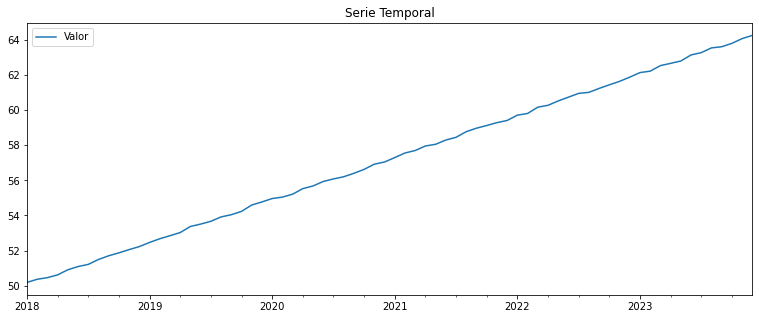

In [41]:
crear_df_fin_tend_det(fecha1,fecha2,'M',columna,[50,0.2],1,0.2)

,Valor
2018-01-31,20.175472
2018-02-28,20.024939
2018-03-31,19.865457
2018-04-30,19.726040
2018-05-31,19.521349
...,...
2024-08-31,8.334168
2024-09-30,8.176996
2024-10-31,7.962782
2024-11-30,7.766724


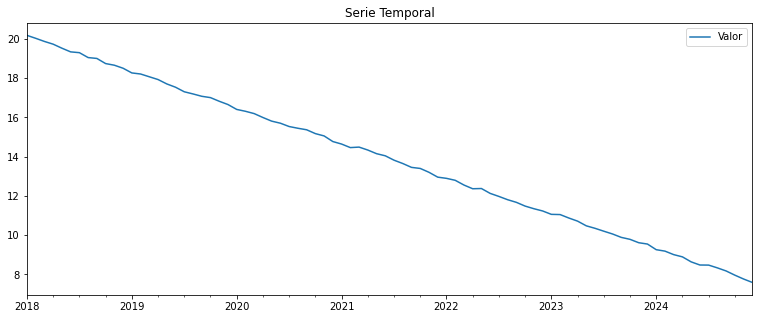

In [43]:
crear_df_periodos_tend_det(fecha1,periodos,'M',columna,[20,-0.15],1,0.2)

CUADRÁTICA (TIPO=2)

,Valor
2018-01-31,50.078591
2018-02-28,49.804532
2018-03-31,49.708635
2018-04-30,49.720055
2018-05-31,49.934448
...,...
2023-08-31,257.720921
2023-09-30,264.210130
2023-10-31,270.897995
2023-11-30,277.556469


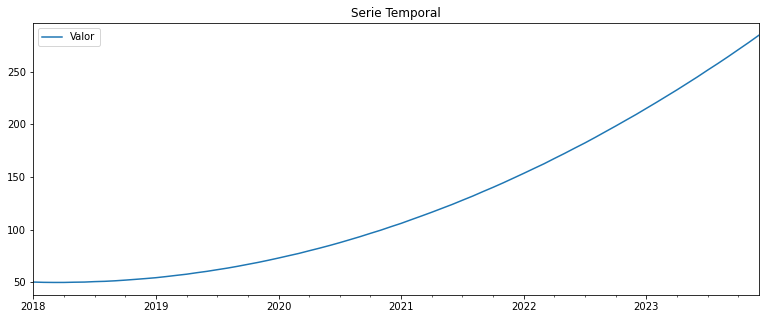

In [58]:
crear_df_fin_tend_det(fecha1,fecha2,'M',columna,[50,-0.25,0.05],2,0.2)

,Valor
2018-01-31,60.069907
2018-02-28,55.154830
2018-03-31,50.562636
2018-04-30,46.264784
2018-05-31,42.115598
...,...
2024-08-31,476.347690
2024-09-30,492.010454
2024-10-31,507.938306
2024-11-30,524.186416


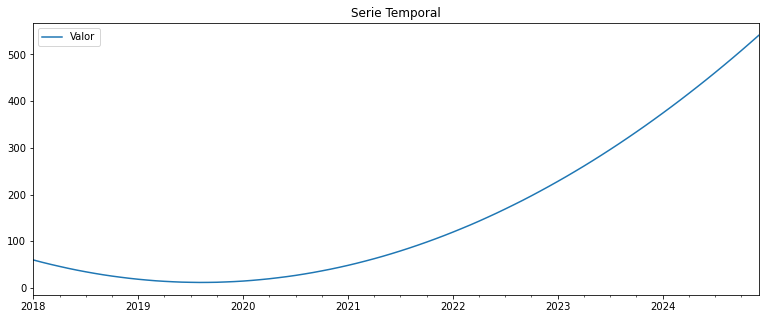

In [56]:
crear_df_periodos_tend_det(fecha1,periodos,'M',columna,[60,-5,0.13],2,0.1)

EXPONENCIAL (TIPO=3)

,Valor
2018-01-31,7.956842e+00
2018-02-28,5.852350e+00
2018-03-31,5.140080e+00
2018-04-30,3.733955e+00
2018-05-31,2.873965e+00
...,...
2023-08-31,4.552544e-07
2023-09-30,3.427254e-07
2023-10-31,2.863668e-07
2023-11-30,1.931224e-07


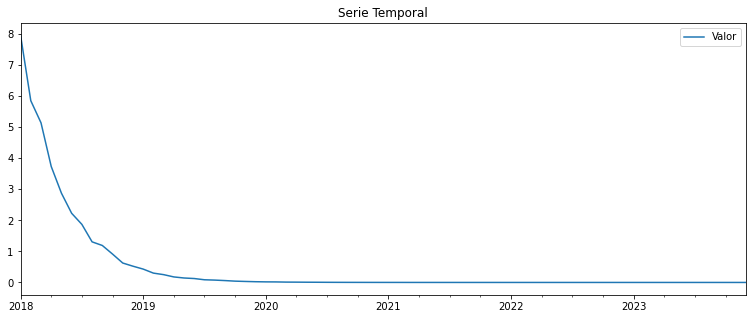

In [60]:
crear_df_fin_tend_det(fecha1,fecha2,'M',columna,[2,-0.25],3,0.2)

,Valor
2018-01-31,7.907732
2018-02-28,8.656201
2018-03-31,9.586988
2018-04-30,10.432665
2018-05-31,11.960770
...,...
2024-08-31,21144.171019
2024-09-30,22869.187604
2024-10-31,24408.032221
2024-11-30,29481.256293


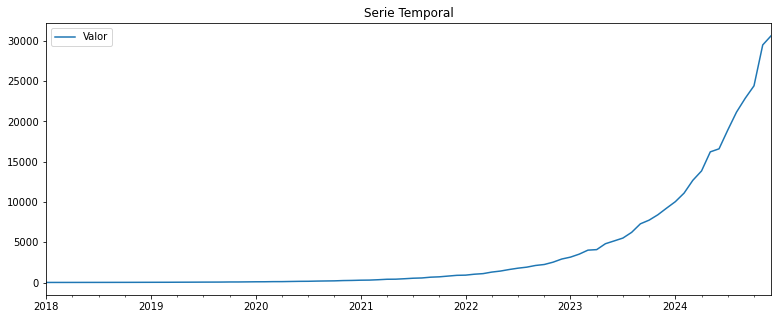

In [63]:
crear_df_periodos_tend_det(fecha1,periodos,'M',columna,[2,0.1],3,0.1)

MODEELOS SEGÚN CIERTAS DISTRIBUCIONES:

,Valor
2018-01-31,75.334479
2018-02-28,79.757428
2018-03-31,81.142761
2018-04-30,84.653205
2018-05-31,81.276009
...,...
2023-08-31,84.790541
2023-09-30,79.583880
2023-10-31,84.834965
2023-11-30,71.822358


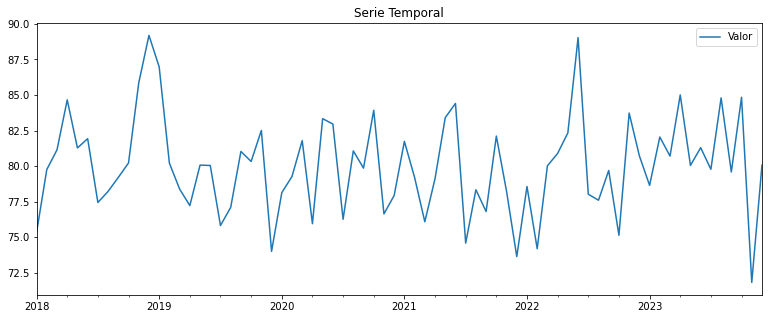

In [64]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,1,[80,4])

,Valor
2018-01-31,51
2018-02-28,50
2018-03-31,50
2018-04-30,50
2018-05-31,51
...,...
2023-08-31,50
2023-09-30,50
2023-10-31,51
2023-11-30,50


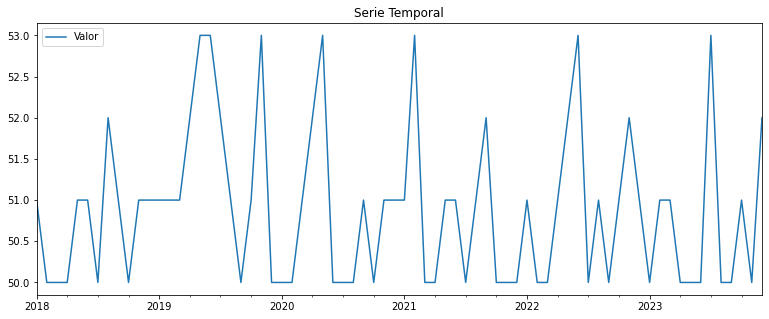

In [66]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,2,[9,0.1,50])

,Valor
2018-01-31,96
2018-02-28,95
2018-03-31,94
2018-04-30,92
2018-05-31,93
...,...
2023-08-31,96
2023-09-30,96
2023-10-31,93
2023-11-30,99


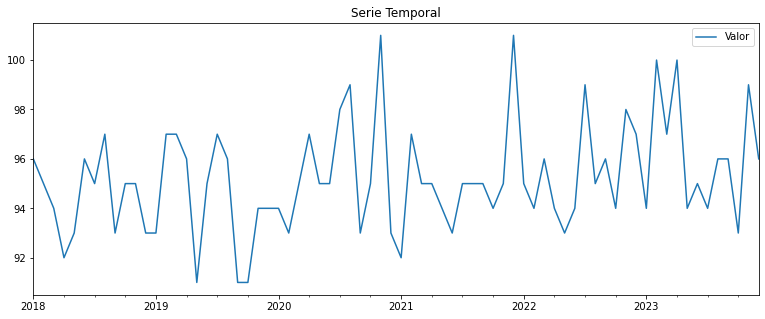

In [67]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,3,[5,90])

,Valor
2018-01-31,83
2018-02-28,81
2018-03-31,76
2018-04-30,78
2018-05-31,76
...,...
2023-08-31,80
2023-09-30,77
2023-10-31,76
2023-11-30,78


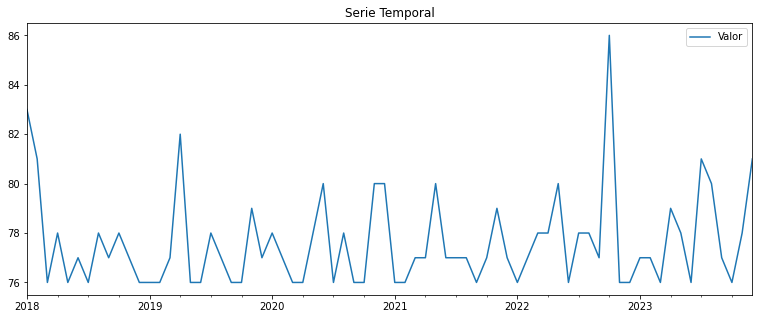

In [68]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,4,[0.3,75])

,Valor
2018-01-31,85
2018-02-28,88
2018-03-31,86
2018-04-30,85
2018-05-31,85
...,...
2023-08-31,83
2023-09-30,85
2023-10-31,84
2023-11-30,85


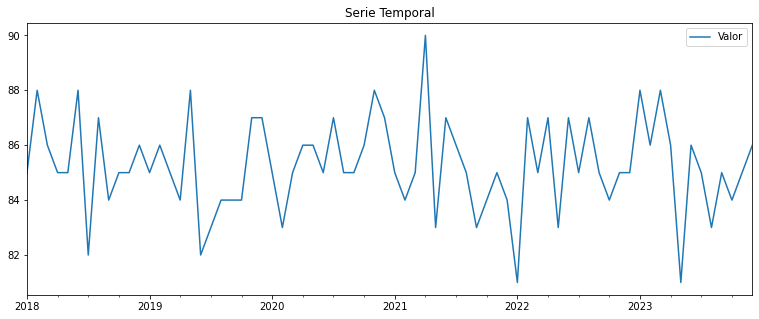

In [69]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,5,[60,17,24,78])

,Valor
2018-01-31,55.0
2018-02-28,55.0
2018-03-31,55.0
2018-04-30,55.0
2018-05-31,55.0
...,...
2023-08-31,55.0
2023-09-30,55.0
2023-10-31,55.0
2023-11-30,55.0


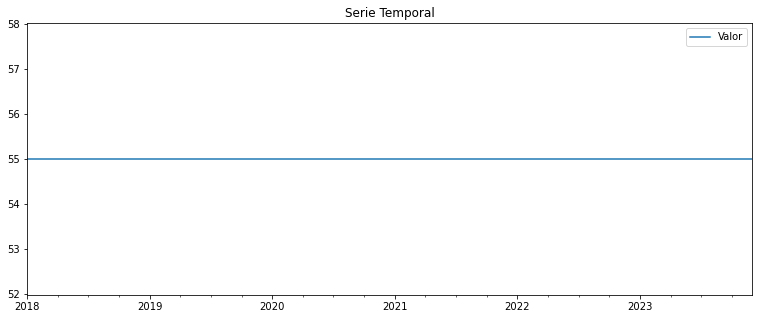

In [71]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,6,[55])

,Valor
2018-01-31,36.324848
2018-02-28,30.598330
2018-03-31,35.973968
2018-04-30,32.238552
2018-05-31,33.211979
...,...
2023-08-31,31.380645
2023-09-30,30.595162
2023-10-31,32.356861
2023-11-30,33.795086


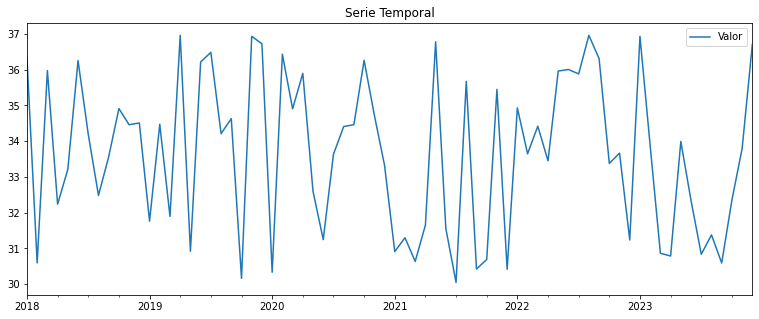

In [72]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,7,[30,7])

,Valor
2018-01-31,81.152530
2018-02-28,80.388603
2018-03-31,84.550280
2018-04-30,81.124255
2018-05-31,112.012449
...,...
2023-08-31,80.270166
2023-09-30,130.364793
2023-10-31,94.955291
2023-11-30,112.470355


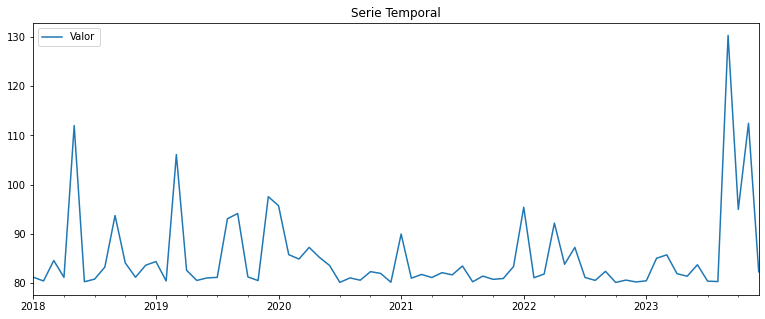

In [73]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,8,[1.5,80,2])

,Valor
2018-01-31,103.629829
2018-02-28,95.881394
2018-03-31,99.247610
2018-04-30,106.192049
2018-05-31,96.346297
...,...
2023-08-31,99.952764
2023-09-30,96.482233
2023-10-31,100.353675
2023-11-30,98.485091


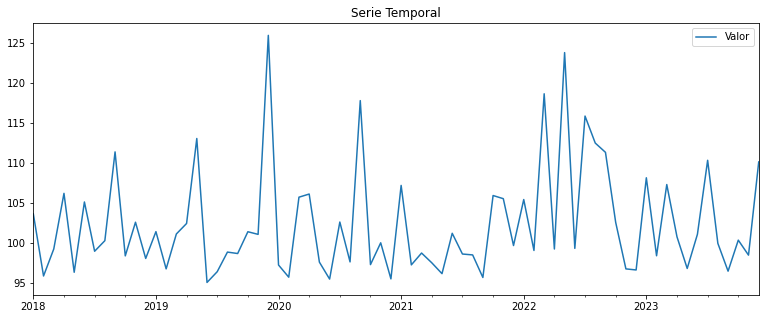

In [74]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,9,[95,7])

,Valor
2018-01-31,44.262035
2018-02-28,44.243670
2018-03-31,42.063460
2018-04-30,51.587079
2018-05-31,51.426055
...,...
2023-08-31,47.715813
2023-09-30,52.344880
2023-10-31,43.207302
2023-11-30,39.860258


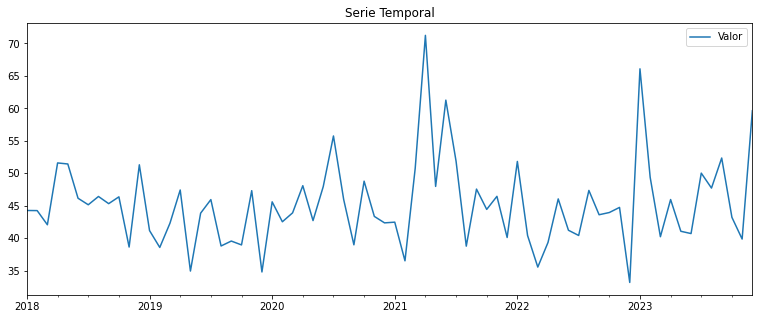

In [75]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,10,[4,32,3])

,Valor
2018-01-31,106.954826
2018-02-28,110.875041
2018-03-31,106.577332
2018-04-30,107.136934
2018-05-31,110.270930
...,...
2023-08-31,106.638800
2023-09-30,108.194773
2023-10-31,106.402271
2023-11-30,107.616336


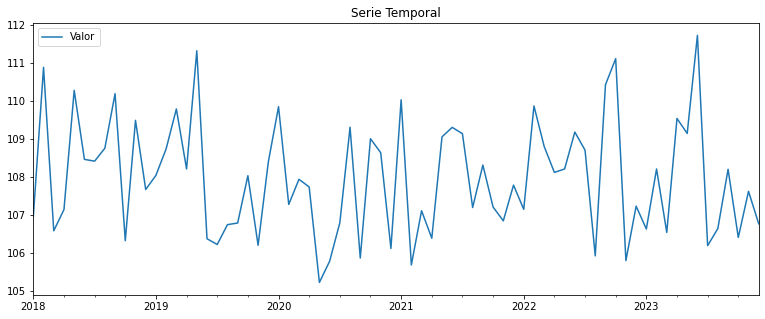

In [77]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,11,[3,5,105,8])

,Valor
2018-01-31,98.750657
2018-02-28,92.950780
2018-03-31,117.054067
2018-04-30,108.818067
2018-05-31,100.236150
...,...
2023-08-31,93.660643
2023-09-30,91.433683
2023-10-31,112.344184
2023-11-30,91.076187


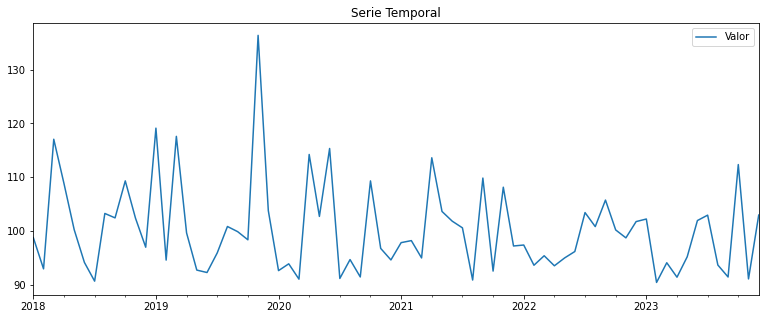

In [78]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,12,[2,90,5])

,Valor
2018-01-31,123.139260
2018-02-28,122.115409
2018-03-31,119.784484
2018-04-30,119.431283
2018-05-31,118.234223
...,...
2023-08-31,118.211478
2023-09-30,131.897536
2023-10-31,119.194029
2023-11-30,118.883048


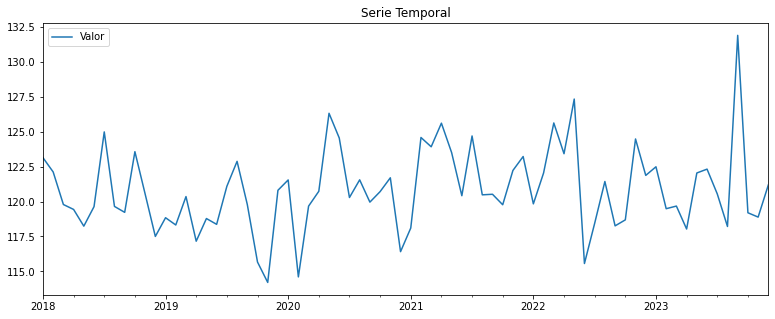

In [79]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,13,[6,120,3])

,Valor
2018-01-31,210.633735
2018-02-28,214.910546
2018-03-31,209.596603
2018-04-30,210.222374
2018-05-31,209.266893
...,...
2023-08-31,210.017247
2023-09-30,210.551278
2023-10-31,220.108203
2023-11-30,212.674765


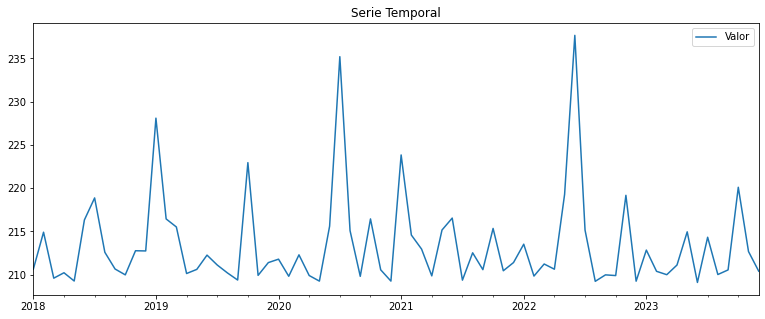

In [81]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,14,[3,200,9])

,Valor
2018-01-31,225.0
2018-02-28,222.0
2018-03-31,219.0
2018-04-30,216.0
2018-05-31,213.0
...,...
2023-08-31,24.0
2023-09-30,21.0
2023-10-31,18.0
2023-11-30,15.0


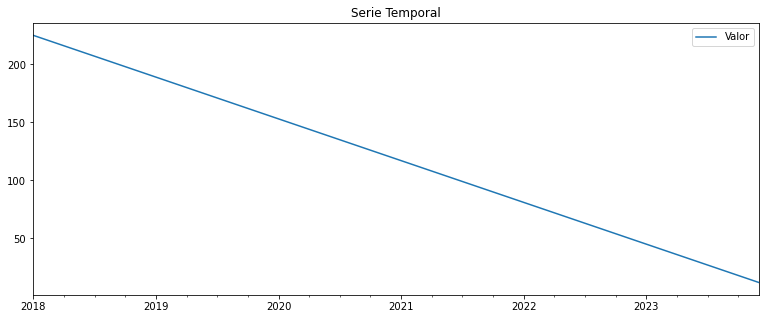

In [82]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,15,[225,3])

,Valor
2018-01-31,60.0
2018-02-28,60.2
2018-03-31,60.4
2018-04-30,60.6
2018-05-31,60.8
...,...
2023-08-31,73.4
2023-09-30,73.6
2023-10-31,73.8
2023-11-30,74.0


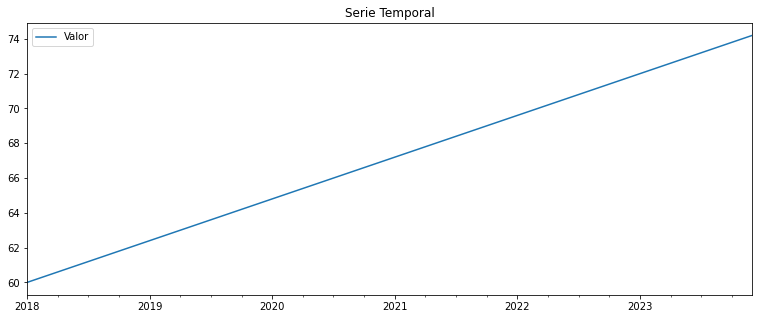

In [83]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,16,[60,0.2])

,Valor
2018-01-31,123.0
2018-02-28,110.0
2018-03-31,108.0
2018-04-30,118.0
2018-05-31,110.0
...,...
2023-08-31,129.0
2023-09-30,114.0
2023-10-31,100.0
2023-11-30,120.0


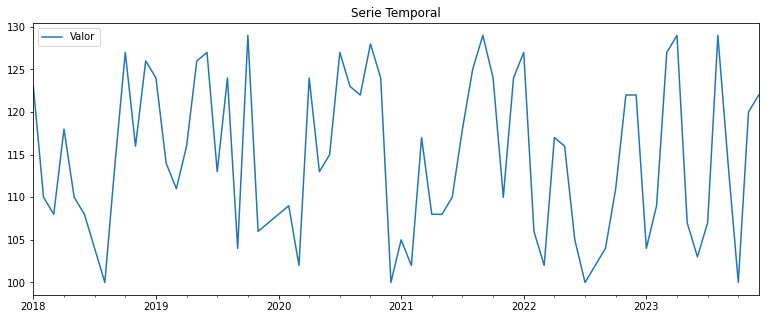

In [84]:
crear_df_fin_datos(fecha1,fecha2,'M',columna,17,[100,130])

,Valor
2018-01-01,85.921815
2018-01-02,75.021019
2018-01-03,80.491283
2018-01-04,77.326650
2018-01-05,70.401410
...,...
2018-03-21,76.292779
2018-03-22,70.292290
2018-03-23,79.742929
2018-03-24,84.105298


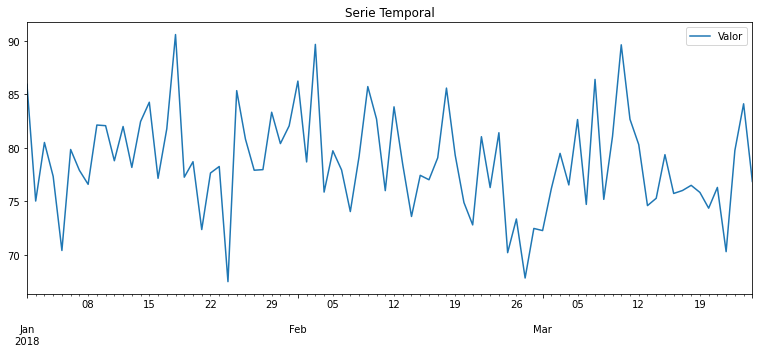

In [85]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,1,[79,5])

,Valor
2018-01-01,97
2018-01-02,95
2018-01-03,99
2018-01-04,96
2018-01-05,93
...,...
2018-03-21,97
2018-03-22,97
2018-03-23,95
2018-03-24,97


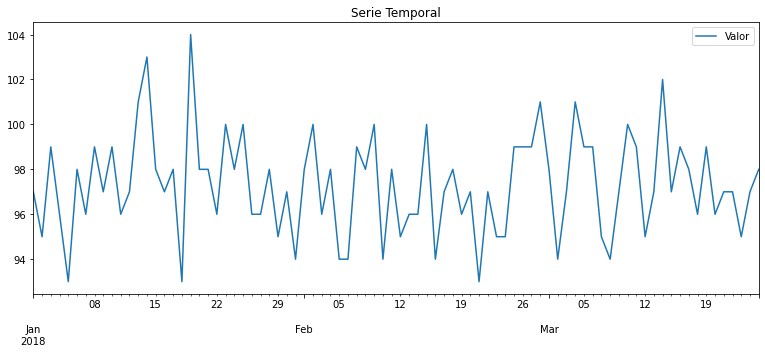

In [87]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,2,[25,0.3,90])

,Valor
2018-01-01,151
2018-01-02,151
2018-01-03,151
2018-01-04,153
2018-01-05,154
...,...
2018-03-21,150
2018-03-22,148
2018-03-23,148
2018-03-24,154


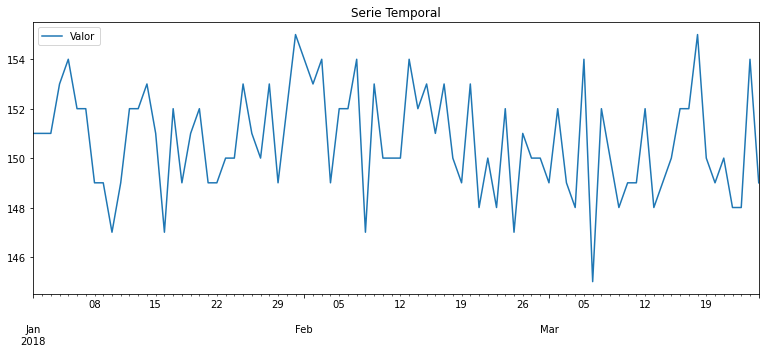

In [88]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,3,[6,145])

,Valor
2018-01-01,196
2018-01-02,190
2018-01-03,190
2018-01-04,191
2018-01-05,192
...,...
2018-03-21,190
2018-03-22,195
2018-03-23,193
2018-03-24,190


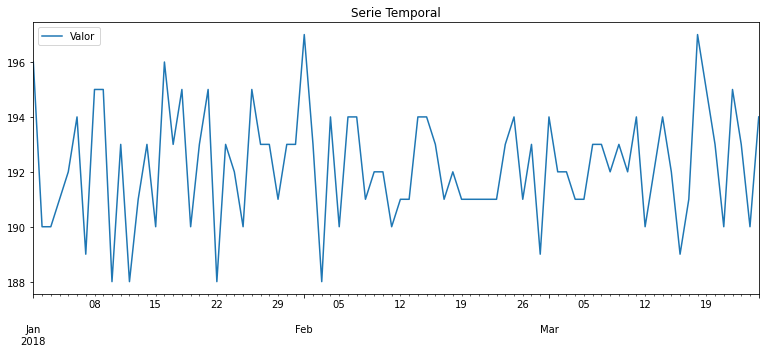

In [92]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,5,[80,33,30,180])

,Valor
2018-01-01,780.0
2018-01-02,780.0
2018-01-03,780.0
2018-01-04,780.0
2018-01-05,780.0
...,...
2018-03-21,780.0
2018-03-22,780.0
2018-03-23,780.0
2018-03-24,780.0


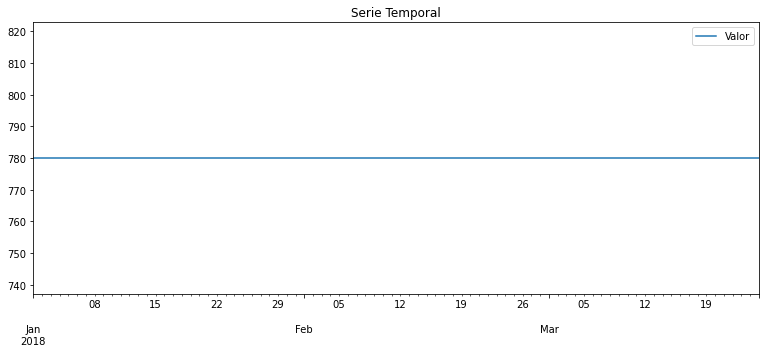

In [93]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,6,[780])

,Valor
2018-01-01,87.366917
2018-01-02,87.329622
2018-01-03,87.219345
2018-01-04,87.419122
2018-01-05,87.453937
...,...
2018-03-21,87.540552
2018-03-22,87.125089
2018-03-23,87.977290
2018-03-24,87.883394


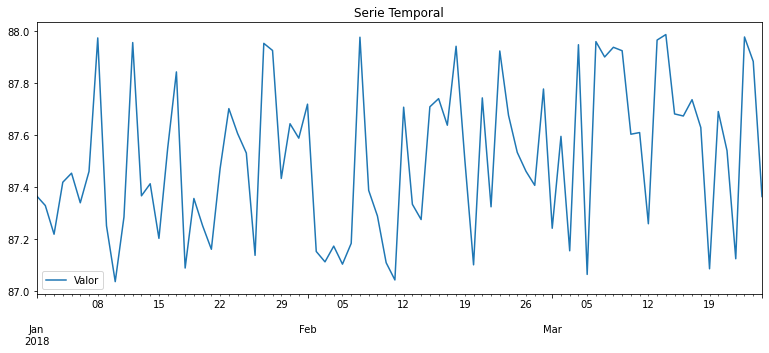

In [95]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,7,[87])

,Valor
2018-01-01,91.346614
2018-01-02,110.062952
2018-01-03,90.090706
2018-01-04,90.119533
2018-01-05,90.007768
...,...
2018-03-21,90.645740
2018-03-22,90.709071
2018-03-23,98.986757
2018-03-24,91.336161


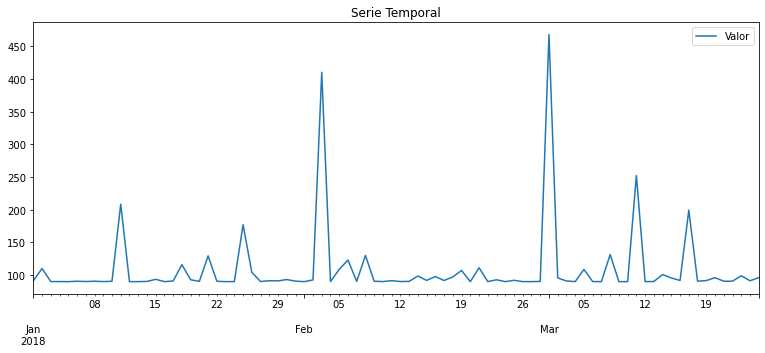

In [97]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,8,[3,90])

,Valor
2018-01-01,170.370333
2018-01-02,170.210519
2018-01-03,170.279273
2018-01-04,170.455722
2018-01-05,170.951788
...,...
2018-03-21,171.793658
2018-03-22,171.177991
2018-03-23,171.516935
2018-03-24,171.991094


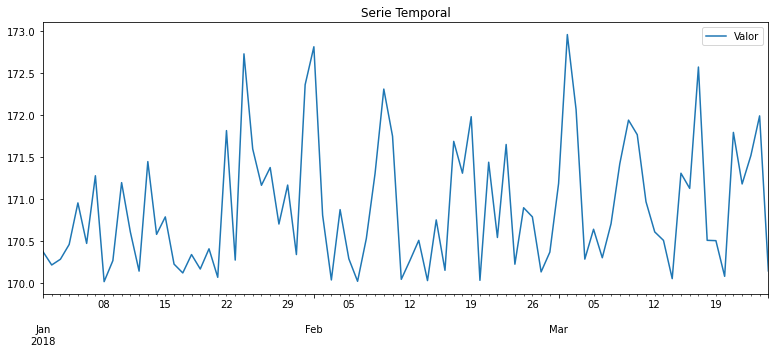

In [100]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,9,[170])

,Valor
2018-01-01,122.022985
2018-01-02,124.216181
2018-01-03,121.920550
2018-01-04,126.231212
2018-01-05,126.174846
...,...
2018-03-21,125.967578
2018-03-22,124.464208
2018-03-23,127.938978
2018-03-24,124.252131


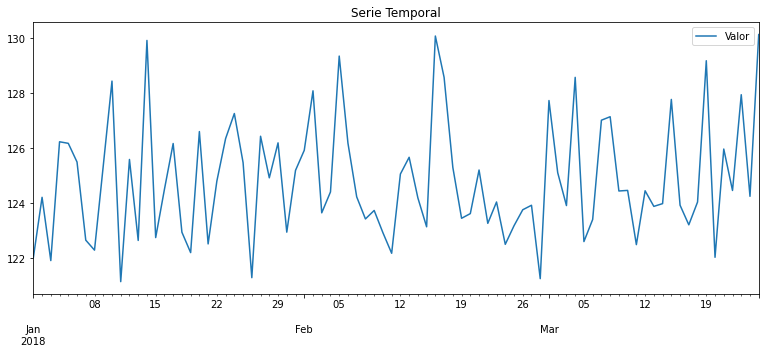

In [102]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,10,[5,120])

,Valor
2018-01-01,137.707940
2018-01-02,137.720485
2018-01-03,136.987979
2018-01-04,138.026764
2018-01-05,139.592199
...,...
2018-03-21,137.842247
2018-03-22,137.485107
2018-03-23,138.190285
2018-03-24,136.178426


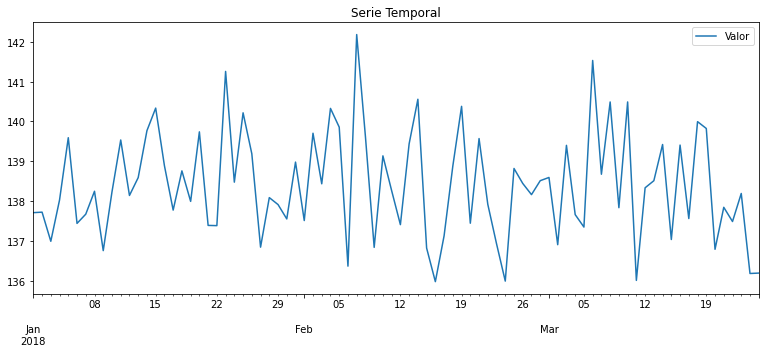

In [104]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,11,[4,8,135,10])

,Valor
2018-01-01,200.393707
2018-01-02,201.027996
2018-01-03,200.628776
2018-01-04,198.310637
2018-01-05,201.293484
...,...
2018-03-21,199.589367
2018-03-22,198.407525
2018-03-23,199.241440
2018-03-24,198.549416


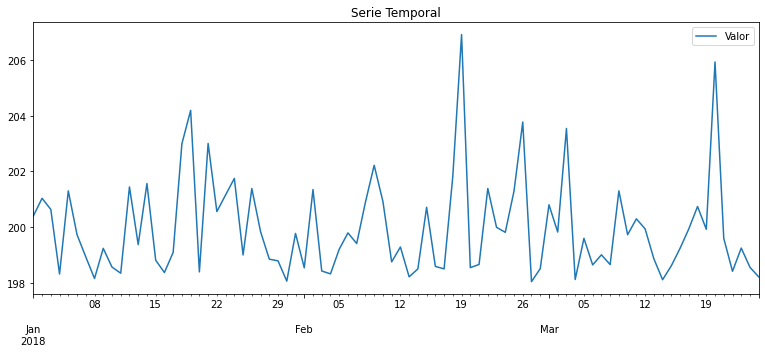

In [105]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,12,[2,198])

,Valor
2018-01-01,182.403139
2018-01-02,182.305373
2018-01-03,183.173042
2018-01-04,183.008014
2018-01-05,182.952750
...,...
2018-03-21,181.968464
2018-03-22,181.549494
2018-03-23,183.206589
2018-03-24,181.076898


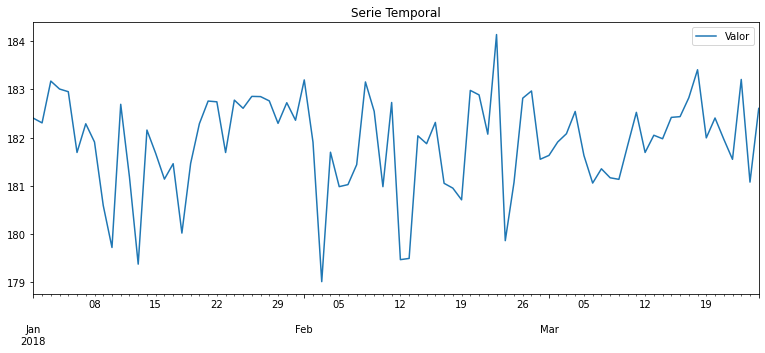

In [106]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,13,[9,182])

,Valor
2018-01-01,112.182649
2018-01-02,111.131288
2018-01-03,114.662004
2018-01-04,111.584199
2018-01-05,119.193886
...,...
2018-03-21,111.721937
2018-03-22,111.296754
2018-03-23,113.623147
2018-03-24,111.439677


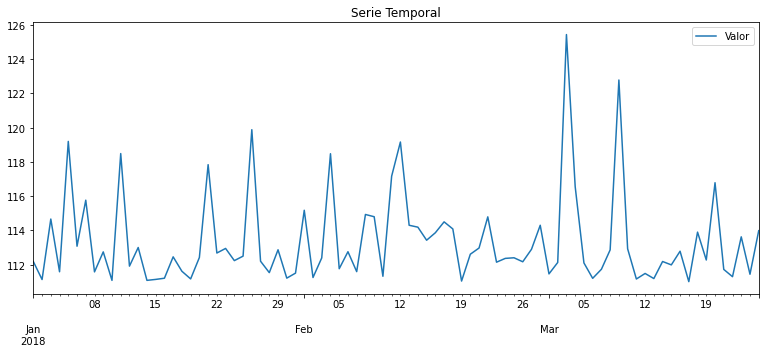

In [108]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,14,[6,96,15])

,Valor
2018-01-01,200.0
2018-01-02,199.4
2018-01-03,198.8
2018-01-04,198.2
2018-01-05,197.6
...,...
2018-03-21,152.6
2018-03-22,152.0
2018-03-23,151.4
2018-03-24,150.8


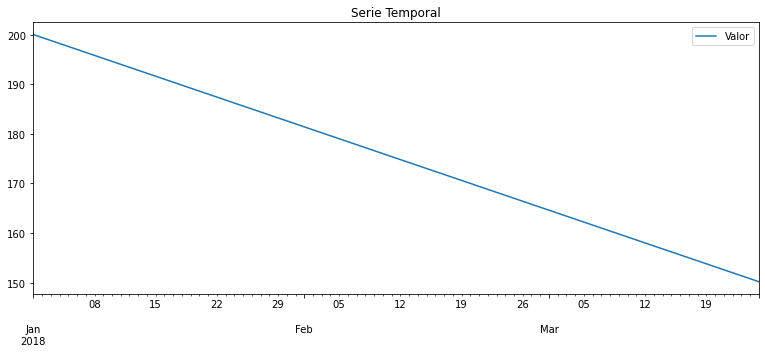

In [109]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,15,[200,0.6])

,Valor
2018-01-01,125.0
2018-01-02,125.7
2018-01-03,126.4
2018-01-04,127.1
2018-01-05,127.8
...,...
2018-03-21,180.3
2018-03-22,181.0
2018-03-23,181.7
2018-03-24,182.4


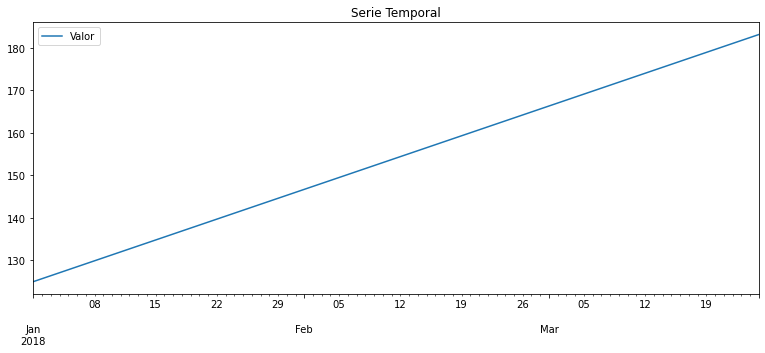

In [110]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,16,[125,0.7])

,Valor
2018-01-01,140.0
2018-01-02,198.0
2018-01-03,120.0
2018-01-04,177.0
2018-01-05,173.0
...,...
2018-03-21,131.0
2018-03-22,178.0
2018-03-23,125.0
2018-03-24,151.0


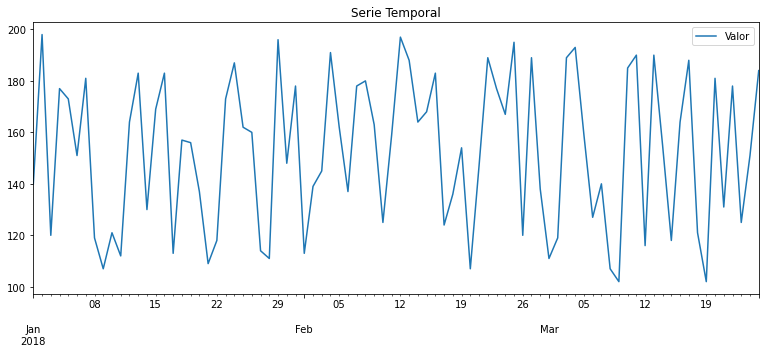

In [111]:
crear_df_periodos_datos(fecha1,periodos,'D',columna,17,[100,200])

MODELOS PERIÓDICOS 

In [120]:
distr_per=1

In [121]:
params_per=[650,25]

,Valor
2018-01-31,656.385913
2018-02-28,663.844196
2018-03-31,612.036110
2018-04-30,641.823145
2018-05-31,660.262839
...,...
2023-08-31,663.616597
2023-09-30,678.339941
2023-10-31,665.445587
2023-11-30,639.494498


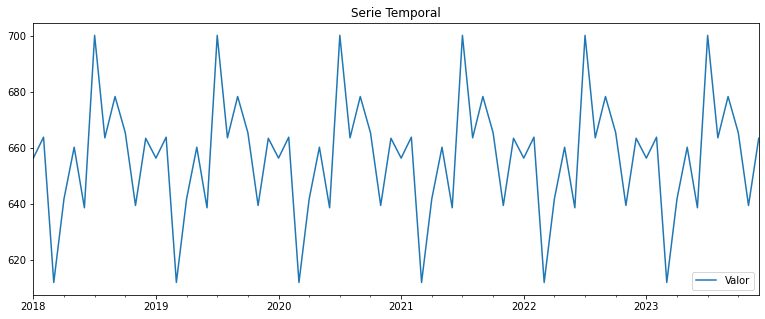

In [112]:
crear_df_fin_periodicos(fecha1,fecha2,'M',columna,distr_per,params_per,12,1)

,Valor
2018-01-31,672.660044
2018-02-28,677.148614
2018-03-31,617.046515
2018-04-30,668.114730
2018-05-31,693.213543
...,...
2023-08-31,668.619230
2023-09-30,641.833686
2023-10-31,656.831605
2023-11-30,667.965832


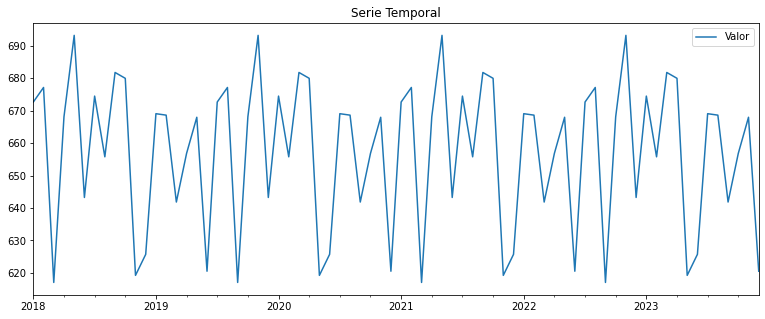

In [119]:
crear_df_fin_periodicos(fecha1,fecha2,'M',columna,distr_per,params_per,4,2)

,Valor
2018-01-31,642.800620
2018-02-28,656.406223
2018-03-31,627.034918
2018-04-30,651.503877
2018-05-31,646.009432
...,...
2024-08-31,673.855407
2024-09-30,656.670375
2024-10-31,664.029746
2024-11-30,663.164926


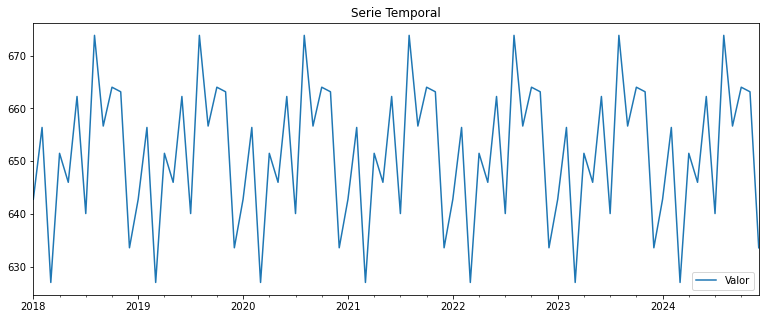

In [116]:
crear_df_periodos_periodicos(fecha1,periodos,'M',columna,distr_per,params_per,12,1)

,Valor
2018-01-31,605.784814
2018-02-28,713.720672
2018-03-31,692.408559
2018-04-30,644.974184
2018-05-31,648.273461
...,...
2024-08-31,646.977393
2024-09-30,634.114861
2024-10-31,603.294466
2024-11-30,670.993269


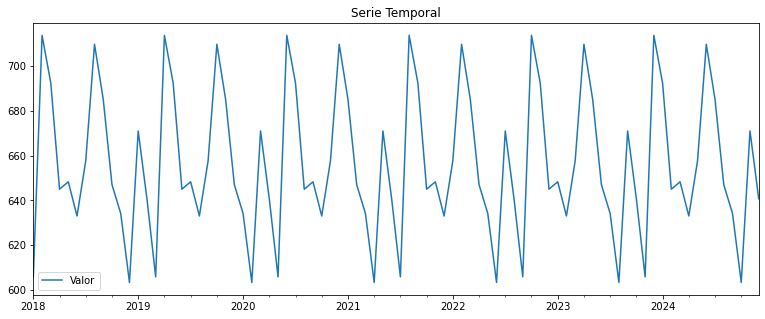

In [118]:
crear_df_periodos_periodicos(fecha1,periodos,'M',columna,distr_per,params_per,6,2)

MODELOS ARMA (AUTORREGRESIVOS Y DE MEDIAS MÓVILES)

In [123]:
c = 125

In [124]:
distr_ARMA = 1

In [125]:
params_ARMA = [300,20]

In [126]:
s = 4

In [127]:
phi = [0.3,0.2,0.1]

In [128]:
teta = [0.2,0.5]

In [129]:
a = []

,Valor
2018-01-31,277.012816
2018-02-28,304.155459
2018-03-31,301.638917
2018-04-30,258.067086
2018-05-31,295.189855
...,...
2023-08-31,1599.555349
2023-09-30,1553.551732
2023-10-31,1574.908421
2023-11-30,1565.724366


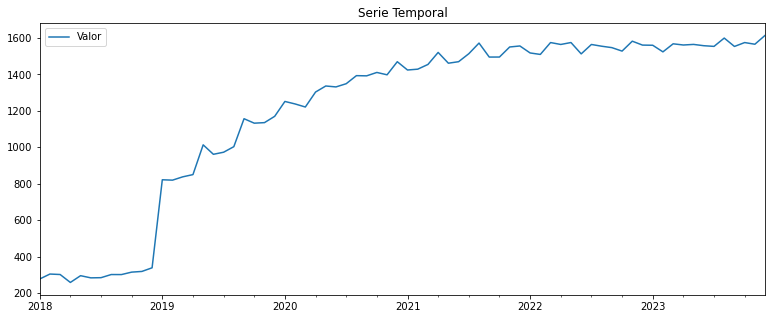

In [130]:
crear_df_fin_ARMA(fecha1,fecha2,'M',columna,c,distr_ARMA,params_ARMA,s,phi,teta,a)

,Valor
2018-01-31,288.761652
2018-02-28,342.064051
2018-03-31,302.576690
2018-04-30,308.318657
2018-05-31,329.689117
...,...
2023-08-31,1041.913126
2023-09-30,1040.670517
2023-10-31,1051.948163
2023-11-30,1094.018421


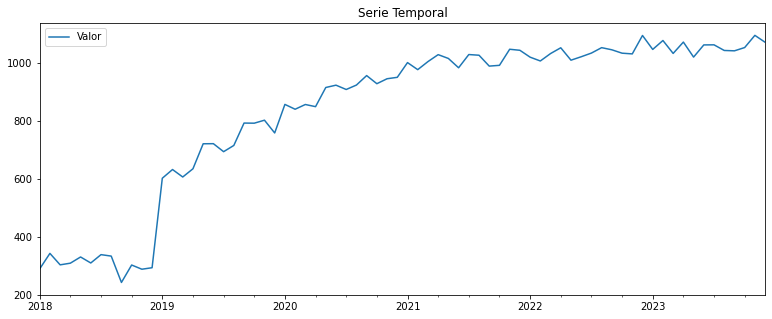

In [131]:
crear_df_fin_ARMA(fecha1,fecha2,'M',columna,c,distr_ARMA,params_ARMA,s,phi,[],a)

,Valor
2018-01-31,271.364760
2018-02-28,311.215988
2018-03-31,286.811161
2018-04-30,283.133616
2018-05-31,274.485037
...,...
2023-08-31,604.917727
2023-09-30,626.780298
2023-10-31,635.451767
2023-11-30,647.679315


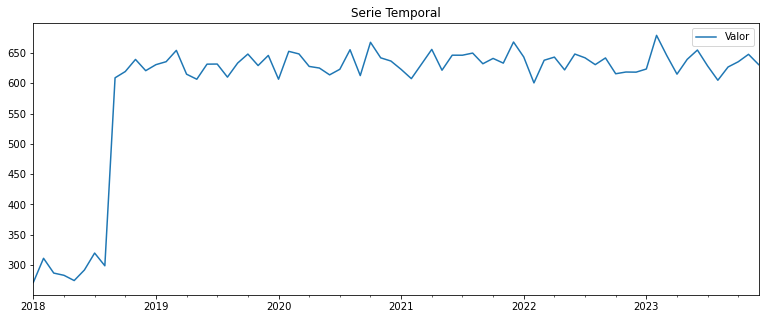

In [132]:
crear_df_fin_ARMA(fecha1,fecha2,'M',columna,c,distr_ARMA,params_ARMA,s,[],teta,a)

,Valor
2018-01-31,273.490814
2018-02-28,304.703785
2018-03-31,316.847287
2018-04-30,852.932842
2018-05-31,994.986782
...,...
2023-08-31,1636.159505
2023-09-30,1630.585047
2023-10-31,1648.149171
2023-11-30,1639.914167


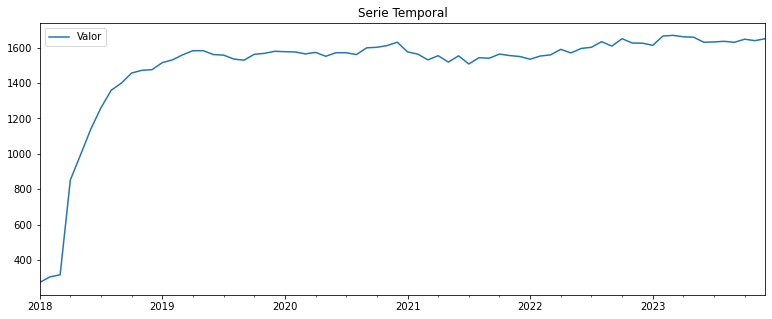

In [133]:
crear_df_fin_ARMA(fecha1,fecha2,'M',columna,c,distr_ARMA,params_ARMA,0,phi,teta,a)

,Valor
2018-01-31,271.360900
2018-02-28,318.254726
2018-03-31,592.247326
2018-04-30,615.536133
2018-05-31,595.554847
...,...
2023-08-31,656.493601
2023-09-30,631.259275
2023-10-31,623.327262
2023-11-30,604.196460


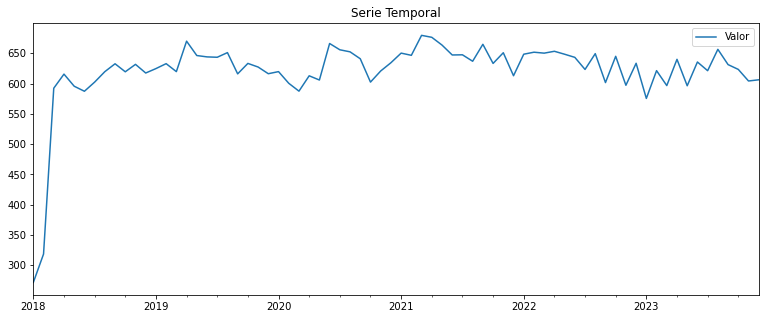

In [134]:
crear_df_fin_ARMA(fecha1,fecha2,'M',columna,c,distr_ARMA,params_ARMA,0,[],teta,a)

,Valor
2018-01-31,276.281690
2018-02-28,302.859989
2018-03-31,320.577926
2018-04-30,643.279640
2018-05-31,716.324126
...,...
2023-08-31,1056.939116
2023-09-30,1070.972518
2023-10-31,1064.863289
2023-11-30,1073.813993


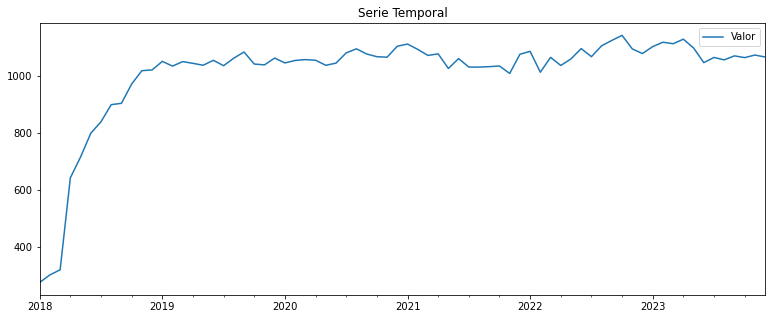

In [135]:
crear_df_fin_ARMA(fecha1,fecha2,'M',columna,c,distr_ARMA,params_ARMA,0,phi,[],a)

,Valor
2018-01-01,319.065292
2018-01-02,274.026254
2018-01-03,313.918664
2018-01-04,300.732344
2018-01-05,286.522464
...,...
2018-03-21,1595.523898
2018-03-22,1537.939830
2018-03-23,1577.394417
2018-03-24,1590.377787


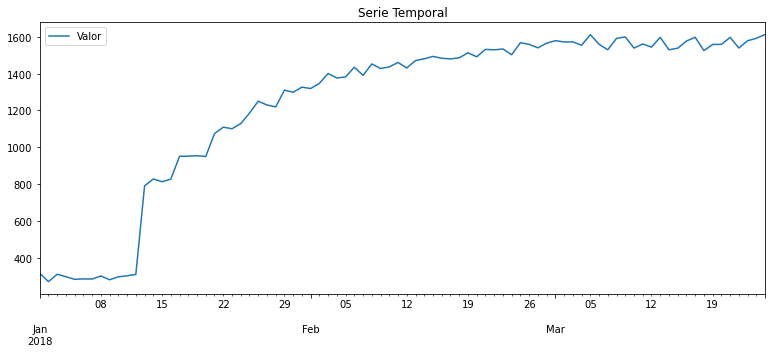

In [137]:
crear_df_periodos_ARMA(fecha1,periodos,'D',columna,c,distr_ARMA,params_ARMA,s,phi,teta,a)

,Valor
2018-01-01,301.112333
2018-01-02,302.553438
2018-01-03,294.130944
2018-01-04,289.172436
2018-01-05,284.204923
...,...
2018-03-21,1107.218751
2018-03-22,1054.282146
2018-03-23,1058.907113
2018-03-24,1050.272649


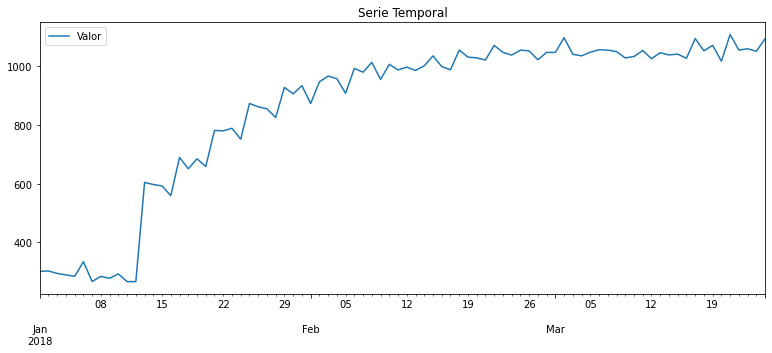

In [138]:
crear_df_periodos_ARMA(fecha1,periodos,'D',columna,c,distr_ARMA,params_ARMA,s,phi,[],a)

,Valor
2018-01-01,328.216659
2018-01-02,308.450128
2018-01-03,301.910689
2018-01-04,328.607517
2018-01-05,346.849558
...,...
2018-03-21,652.936158
2018-03-22,593.958565
2018-03-23,635.076742
2018-03-24,631.699690


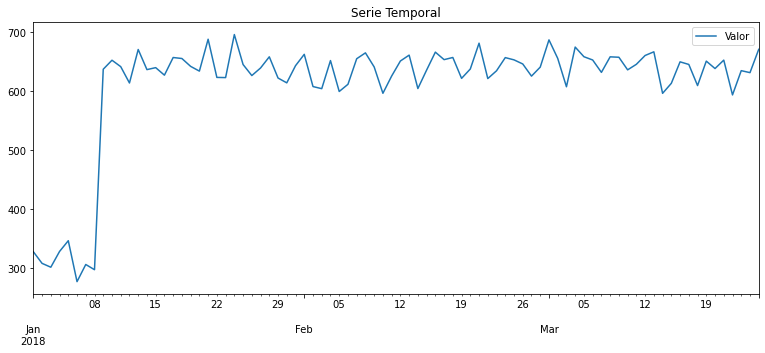

In [139]:
crear_df_periodos_ARMA(fecha1,periodos,'D',columna,c,distr_ARMA,params_ARMA,s,[],teta,a)

,Valor
2018-01-01,314.835098
2018-01-02,268.227860
2018-01-03,299.608387
2018-01-04,771.647580
2018-01-05,937.004021
...,...
2018-03-21,1519.091181
2018-03-22,1556.604438
2018-03-23,1570.377119
2018-03-24,1586.794278


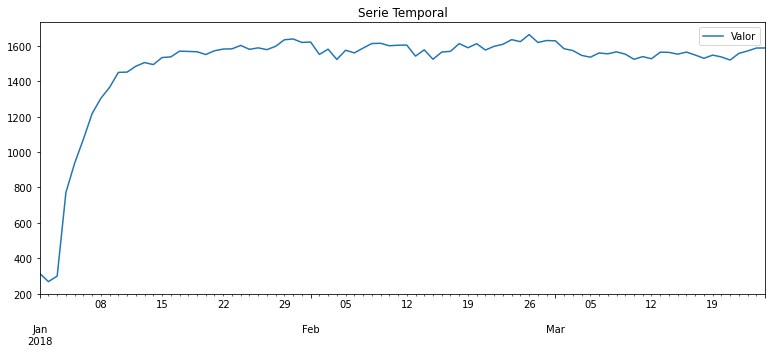

In [140]:
crear_df_periodos_ARMA(fecha1,periodos,'D',columna,c,distr_ARMA,params_ARMA,0,phi,teta,a)

,Valor
2018-01-01,285.966283
2018-01-02,231.615836
2018-01-03,603.858658
2018-01-04,604.714844
2018-01-05,647.109388
...,...
2018-03-21,613.306243
2018-03-22,585.898244
2018-03-23,613.196210
2018-03-24,592.618695


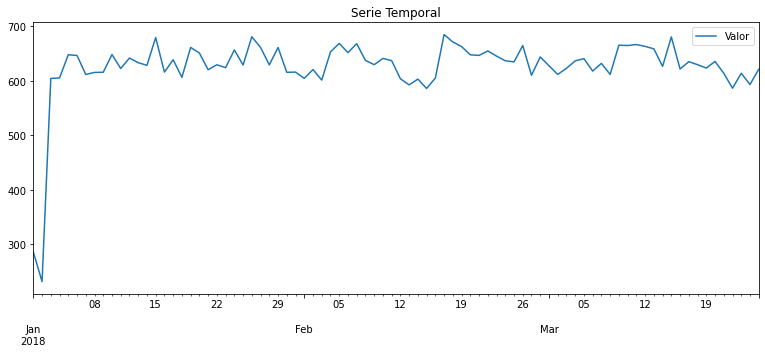

In [142]:
crear_df_periodos_ARMA(fecha1,periodos,'D',columna,c,distr_ARMA,params_ARMA,0,[],teta,a)

,Valor
2018-01-01,339.171625
2018-01-02,314.097520
2018-01-03,290.253838
2018-01-04,582.068363
2018-01-05,678.486859
...,...
2018-03-21,1028.043201
2018-03-22,1069.195305
2018-03-23,1051.906510
2018-03-24,1064.224948


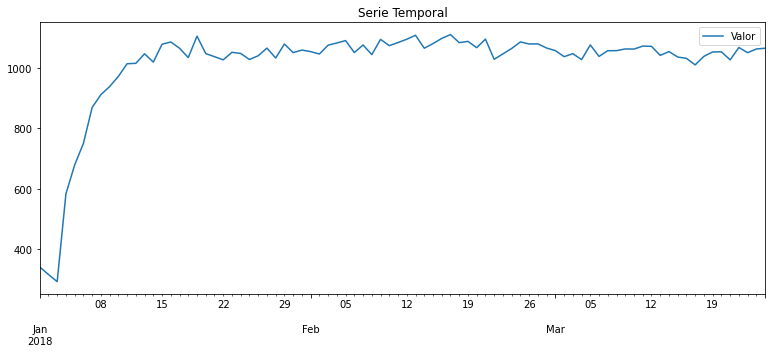

In [143]:
crear_df_periodos_ARMA(fecha1,periodos,'D',columna,c,distr_ARMA,params_ARMA,0,phi,[],a)

MODELOS CON DRIFT

In [145]:
paramsD1=[1,[350,23]]
paramsD2=[2,[20,0.6,200]]

In [146]:
params_ARMA1 = [250,1,[300,15],3, [0.2,0.4],[0.3],[]]
params_ARMA2 = [270,1,[330,15],0, [0.8],[0.3,0.25],[]]

In [159]:
params_per1= [1,1,[200,14],4]
params_per2= [2,1,[250,21],4]

In [148]:
params_tend1 = [[200,0.3],1,0.3]
params_tend2 = [[150,-4,0.2],2,0.15]

,Valor
2018-01-31,323.266142
2018-02-28,341.166957
2018-03-31,349.944189
2018-04-30,353.914435
2018-05-31,358.529744
...,...
2023-08-31,215.000000
2023-09-30,214.000000
2023-10-31,213.000000
2023-11-30,214.000000


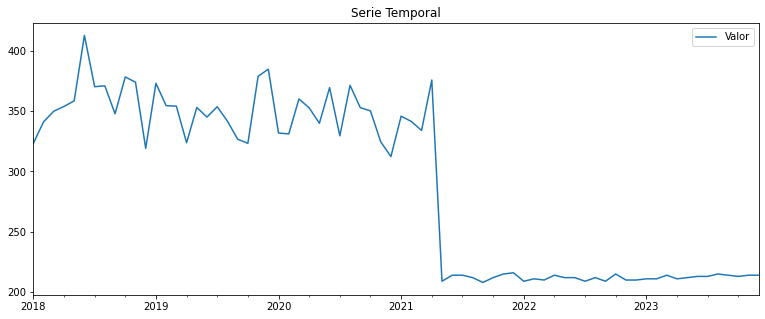

In [149]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,paramsD1,paramsD2,1,40)

,Valor
2018-01-31,339.775991
2018-02-28,368.710041
2018-03-31,349.676350
2018-04-30,323.363456
2018-05-31,333.468617
...,...
2023-08-31,1499.444548
2023-09-30,1491.761323
2023-10-31,1486.064763
2023-11-30,1517.169783


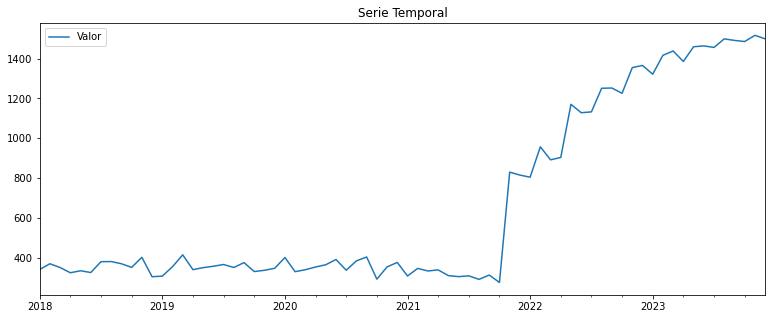

In [150]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,paramsD1,params_ARMA1,2,40)

,Valor
2018-01-31,212.000000
2018-02-28,210.000000
2018-03-31,212.000000
2018-04-30,212.000000
2018-05-31,212.000000
...,...
2023-08-31,197.579176
2023-09-30,219.307257
2023-10-31,181.767446
2023-11-30,204.754542


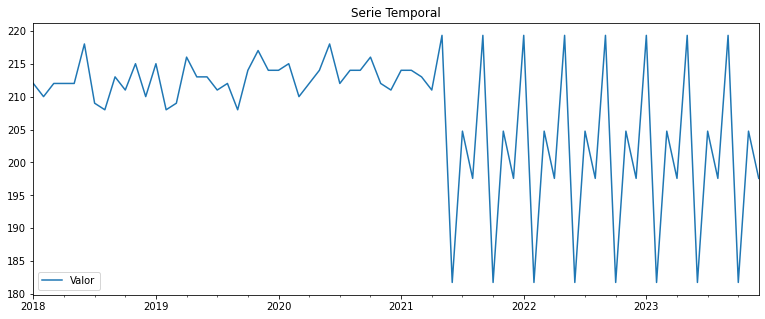

In [151]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,paramsD2,params_per1,3,40)

,Valor
2018-01-31,344.874975
2018-02-28,317.872196
2018-03-31,341.757588
2018-04-30,339.321879
2018-05-31,339.031008
...,...
2023-08-31,187.876118
2023-09-30,194.879400
2023-10-31,202.217649
2023-11-30,210.100773


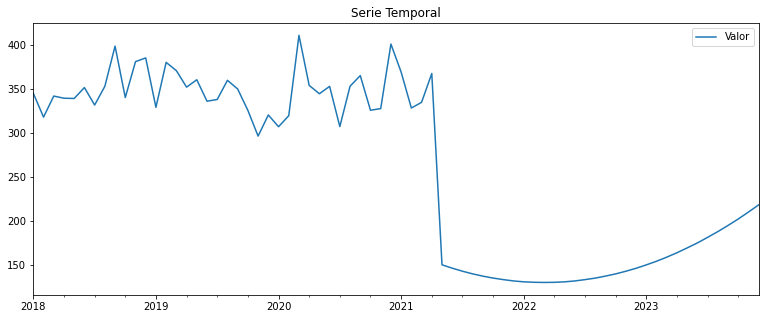

In [152]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,paramsD1,params_tend2,4,40)

,Valor
2018-01-31,297.922545
2018-02-28,313.105172
2018-03-31,286.661239
2018-04-30,293.069010
2018-05-31,297.855796
...,...
2023-08-31,3890.029240
2023-09-30,3901.652242
2023-10-31,3897.989595
2023-11-30,3931.726375


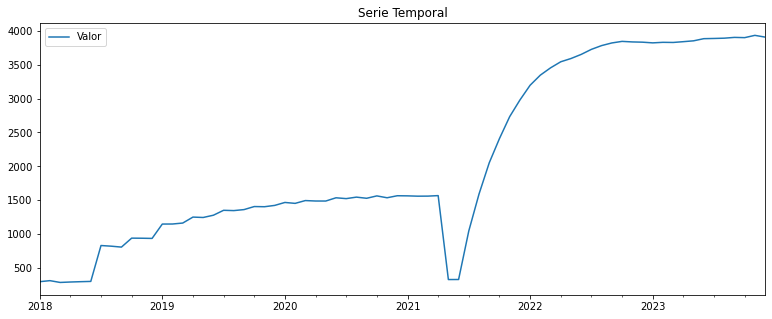

In [153]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_ARMA1,params_ARMA2,5,40)

,Valor
2018-01-31,293.835749
2018-02-28,305.773060
2018-03-31,283.503515
2018-04-30,303.745123
2018-05-31,299.231312
...,...
2023-08-31,213.000000
2023-09-30,214.000000
2023-10-31,214.000000
2023-11-30,212.000000


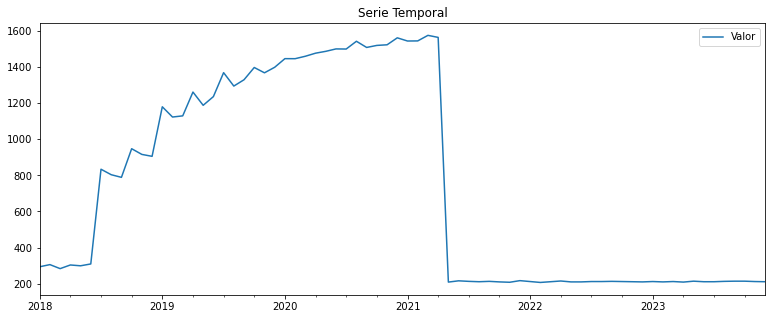

In [155]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_ARMA1,paramsD2,6,40)

,Valor
2018-01-31,329.934881
2018-02-28,331.576115
2018-03-31,1069.107322
2018-04-30,1649.178866
2018-05-31,2115.055527
...,...
2023-08-31,251.176490
2023-09-30,264.993465
2023-10-31,207.465832
2023-11-30,218.536359


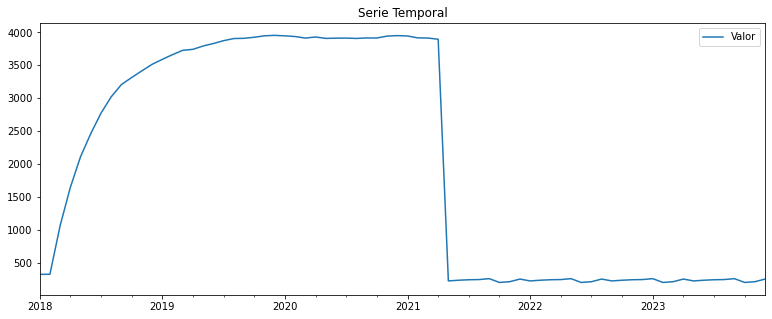

In [160]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_ARMA2,params_per2,7,40)

,Valor
2018-01-31,307.792403
2018-02-28,319.807277
2018-03-31,298.819690
2018-04-30,302.317434
2018-05-31,303.842825
...,...
2023-08-31,208.268819
2023-09-30,208.529802
2023-10-31,208.949160
2023-11-30,209.030139


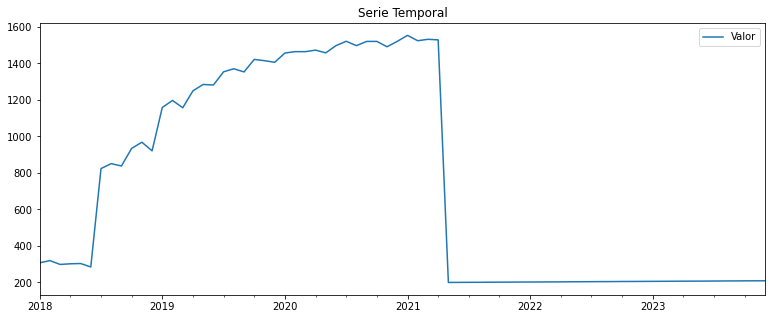

In [162]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_ARMA1,params_tend1,8,40)

,Valor
2018-01-31,202.432929
2018-02-28,215.767243
2018-03-31,177.957254
2018-04-30,217.505072
2018-05-31,202.432929
...,...
2023-08-31,245.267186
2023-09-30,240.151778
2023-10-31,255.017199
2023-11-30,237.194208


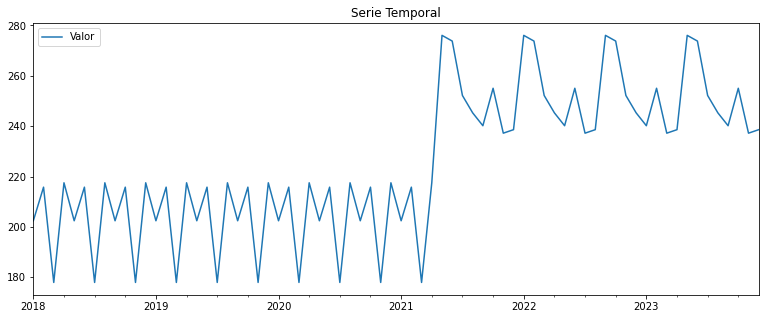

In [163]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_per1,params_per2,9,40)

,Valor
2018-01-31,193.245855
2018-02-28,188.468685
2018-03-31,193.002207
2018-04-30,196.284513
2018-05-31,193.245855
...,...
2023-08-31,361.717044
2023-09-30,354.367308
2023-10-31,336.417310
2023-11-30,364.708636


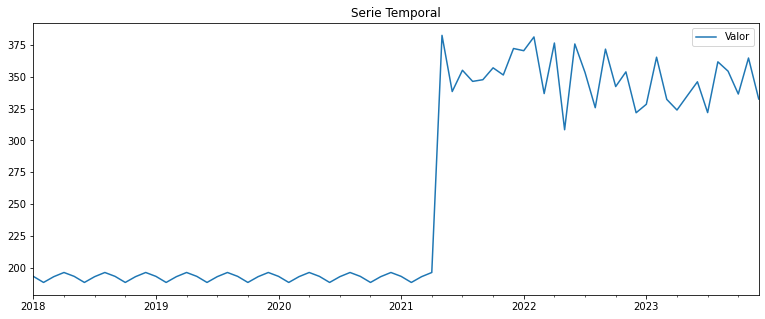

In [164]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_per1,paramsD1,10,40)

,Valor
2018-01-31,256.566526
2018-02-28,206.641214
2018-03-31,235.678834
2018-04-30,225.277906
2018-05-31,217.419075
...,...
2023-08-31,3906.132005
2023-09-30,3946.851928
2023-10-31,3977.822617
2023-11-30,3963.985743


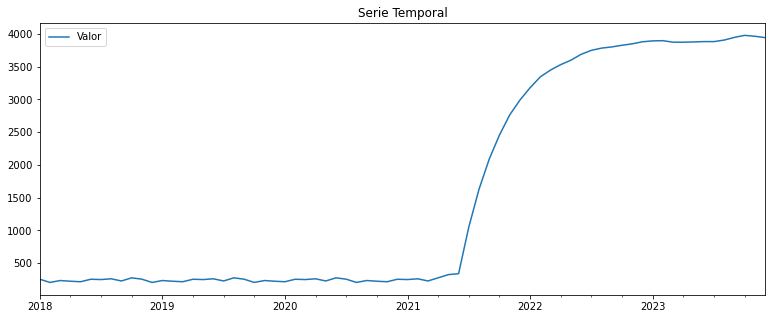

In [166]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_per2,params_ARMA2,11,40)

,Valor
2018-01-31,222.494008
2018-02-28,217.689124
2018-03-31,225.949466
2018-04-30,227.120162
2018-05-31,227.696517
...,...
2023-08-31,208.293857
2023-09-30,208.564659
2023-10-31,208.911501
2023-11-30,209.092498


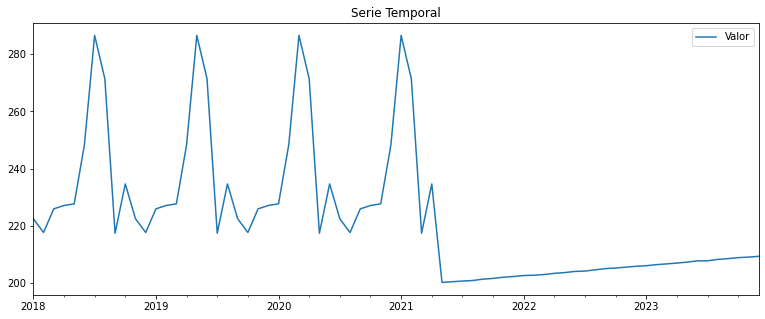

In [168]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_per2,params_tend1,12,40)

,Valor
2018-01-31,200.009574
2018-02-28,200.412179
2018-03-31,200.764264
2018-04-30,201.147238
2018-05-31,201.291703
...,...
2023-08-31,187.801393
2023-09-30,194.883106
2023-10-31,202.241405
2023-11-30,210.053785


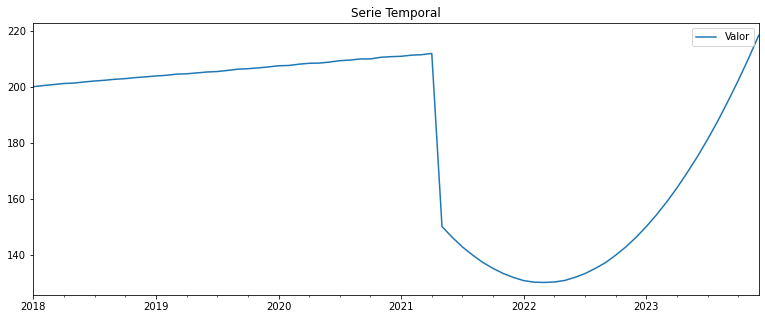

In [169]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_tend1,params_tend2,13,40)

,Valor
2018-01-31,200.007292
2018-02-28,200.585646
2018-03-31,200.649703
2018-04-30,200.903085
2018-05-31,201.391987
...,...
2023-08-31,211.000000
2023-09-30,210.000000
2023-10-31,211.000000
2023-11-30,208.000000


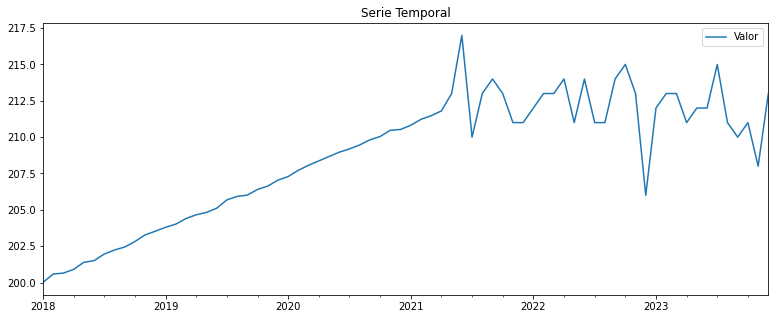

In [170]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_tend1,paramsD2,14,40)

,Valor
2018-01-31,150.071822
2018-02-28,146.346302
2018-03-31,142.941898
2018-04-30,139.949759
2018-05-31,137.315283
...,...
2023-08-31,1492.013243
2023-09-30,1508.759734
2023-10-31,1510.226687
2023-11-30,1532.278180


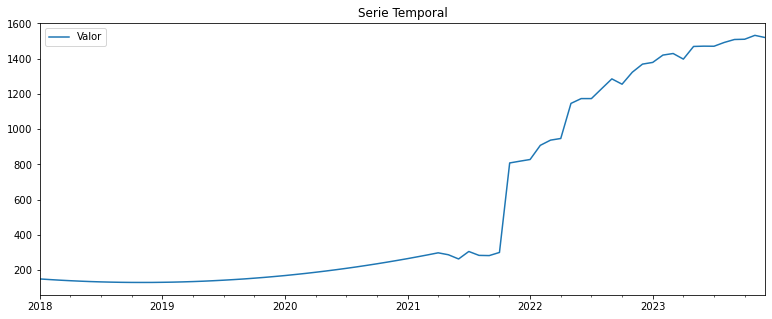

In [171]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_tend2,params_ARMA1,15,40)

,Valor
2018-01-31,200.009266
2018-02-28,200.301701
2018-03-31,200.640560
2018-04-30,200.933517
2018-05-31,201.464800
...,...
2023-08-31,260.328116
2023-09-30,226.847522
2023-10-31,207.449591
2023-11-30,200.645509


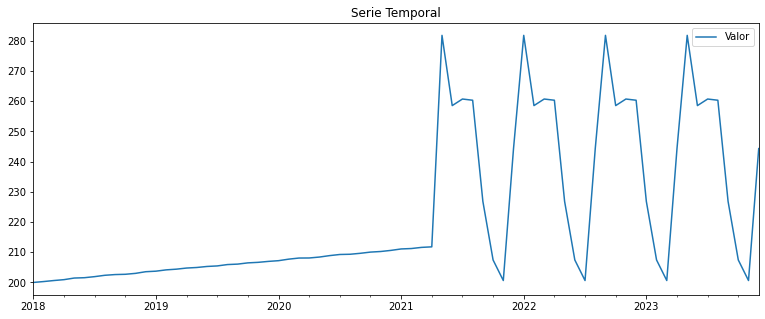

In [173]:
crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_tend1,params_per2,16,40)

,Valor
2018-01-01,349.688213
2018-01-02,336.592787
2018-01-03,376.799993
2018-01-04,391.534152
2018-01-05,316.779031
...,...
2018-03-21,213.000000
2018-03-22,209.000000
2018-03-23,214.000000
2018-03-24,211.000000


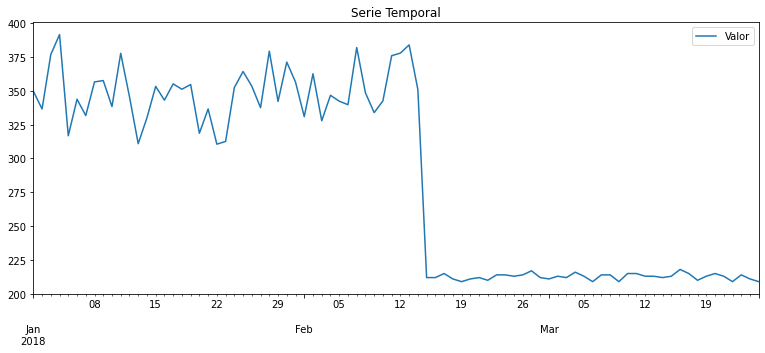

In [174]:
crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,paramsD1,paramsD2,1,45)

,Valor
2018-01-01,342.445664
2018-01-02,311.073361
2018-01-03,332.242548
2018-01-04,373.498833
2018-01-05,344.197649
...,...
2018-03-21,1589.771561
2018-03-22,1535.731598
2018-03-23,1558.403714
2018-03-24,1582.311484


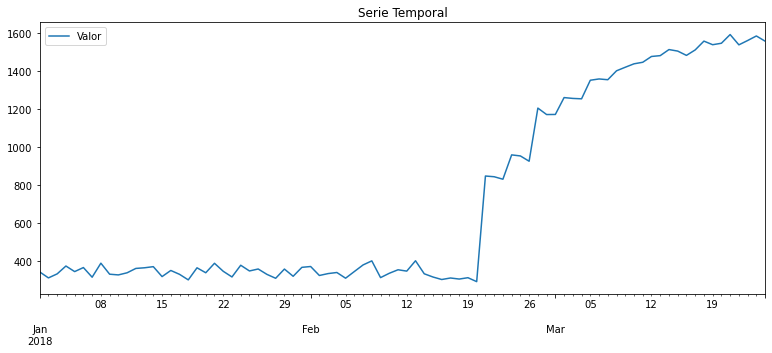

In [175]:
crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,paramsD1,params_ARMA1,2,45)

,Valor
2018-01-01,213.000000
2018-01-02,210.000000
2018-01-03,212.000000
2018-01-04,211.000000
2018-01-05,209.000000
...,...
2018-03-21,253.065910
2018-03-22,244.979008
2018-03-23,240.003912
2018-03-24,253.086125


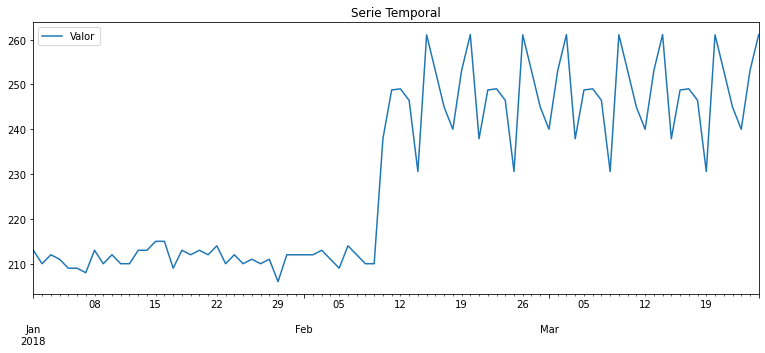

In [177]:
crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,paramsD2,params_per2,3,40)

,Valor
2018-01-01,359.682127
2018-01-02,337.824755
2018-01-03,365.416585
2018-01-04,385.677360
2018-01-05,373.415535
...,...
2018-03-21,298.340889
2018-03-22,310.139095
2018-03-23,322.275894
2018-03-24,334.812757


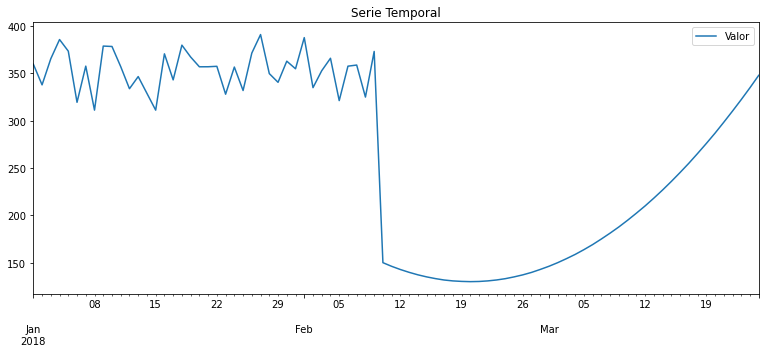

In [178]:
crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,paramsD1,params_tend2,4,40)

,Valor
2018-01-01,302.365935
2018-01-02,320.787456
2018-01-03,301.545160
2018-01-04,314.575226
2018-01-05,307.693049
...,...
2018-03-21,3894.547343
2018-03-22,3905.188129
2018-03-23,3919.277459
2018-03-24,3908.442855


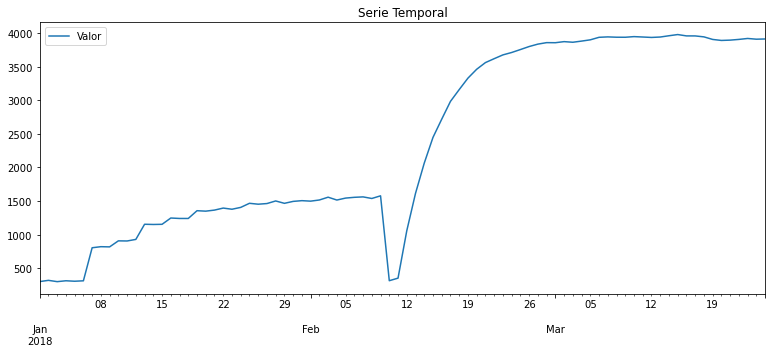

In [179]:
crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_ARMA1,params_ARMA2,5,40)

,Valor
2018-01-01,288.539838
2018-01-02,294.614089
2018-01-03,302.363097
2018-01-04,335.073763
2018-01-05,291.210734
...,...
2018-03-21,344.647011
2018-03-22,370.701479
2018-03-23,368.538584
2018-03-24,322.083951


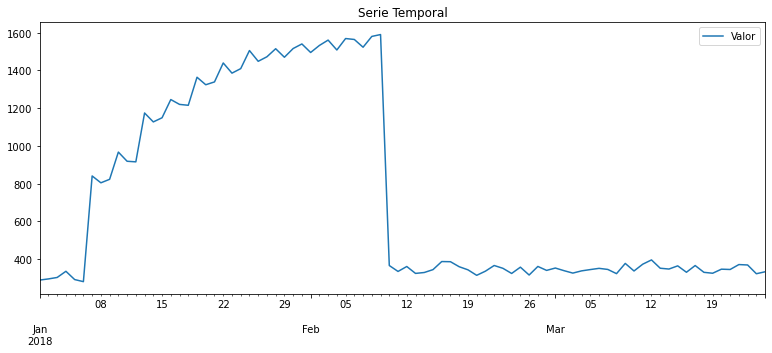

In [181]:
crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_ARMA1,paramsD1,6,40)

,Valor
2018-01-01,298.813742
2018-01-02,319.192775
2018-01-03,300.739619
2018-01-04,282.904374
2018-01-05,312.155259
...,...
2018-03-21,278.150982
2018-03-22,285.476283
2018-03-23,213.137314
2018-03-24,223.213763


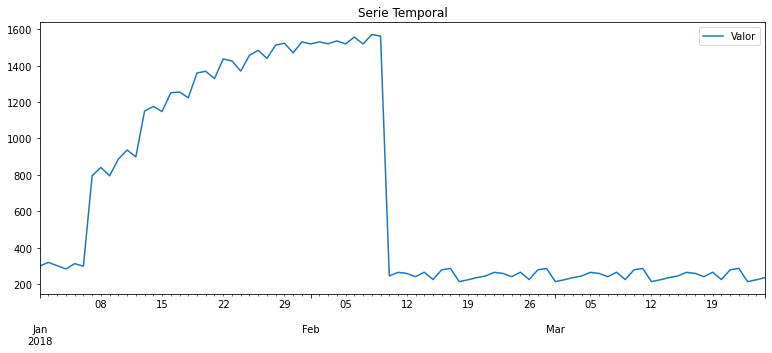

In [182]:
crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_ARMA1,params_per2,7,40)

,Valor
2018-01-01,327.057625
2018-01-02,342.334810
2018-01-03,1064.942891
2018-01-04,1675.114222
2018-01-05,2135.548953
...,...
2018-03-21,298.297356
2018-03-22,310.033256
2018-03-23,322.277026
2018-03-24,334.947091


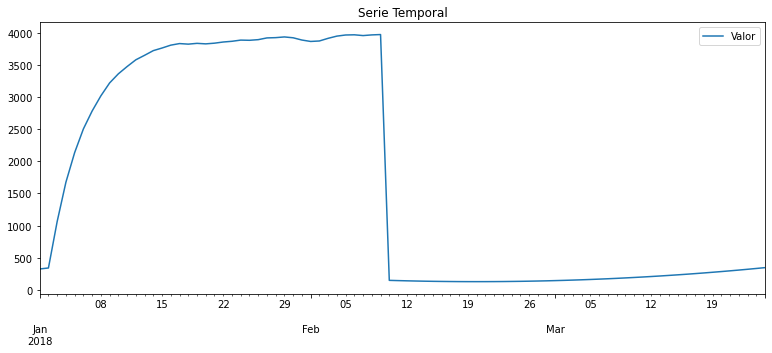

In [185]:
crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_ARMA2,params_tend2,8,40)

,Valor
2018-01-01,197.903797
2018-01-02,180.009454
2018-01-03,205.196270
2018-01-04,210.050387
2018-01-05,197.903797
...,...
2018-03-21,269.462621
2018-03-22,250.597762
2018-03-23,226.805014
2018-03-24,274.488247


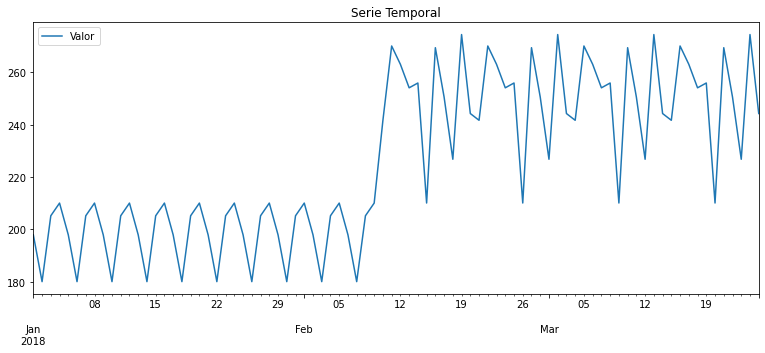

In [186]:
crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_per1,params_per2,9,40)

,Valor
2018-01-01,250.526225
2018-01-02,227.686085
2018-01-03,253.800289
2018-01-04,292.513839
2018-01-05,275.380793
...,...
2018-03-21,212.000000
2018-03-22,212.000000
2018-03-23,212.000000
2018-03-24,213.000000


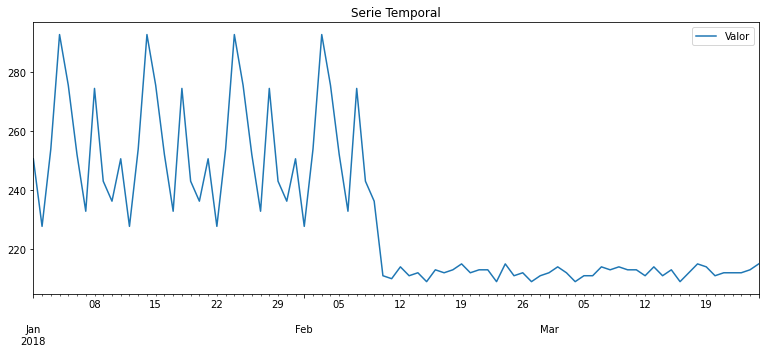

In [187]:
crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_per2,paramsD2,10,40)

,Valor
2018-01-01,239.050171
2018-01-02,244.555132
2018-01-03,236.982634
2018-01-04,243.942647
2018-01-05,243.626586
...,...
2018-03-21,3838.996765
2018-03-22,3843.390360
2018-03-23,3850.002614
2018-03-24,3843.402319


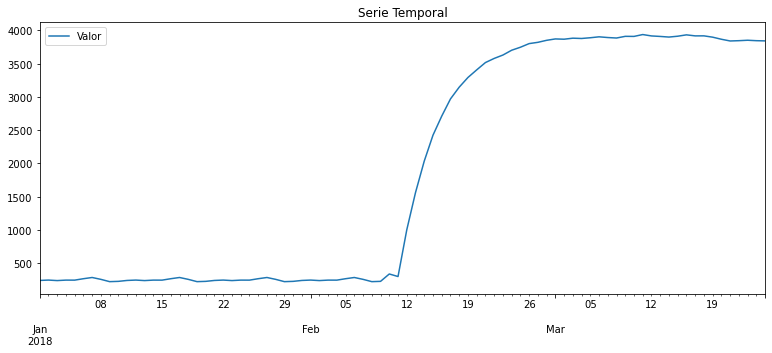

In [189]:
crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_per2,params_ARMA2,11,40)

,Valor
2018-01-01,179.605730
2018-01-02,196.673431
2018-01-03,213.714191
2018-01-04,199.024795
2018-01-05,179.605730
...,...
2018-03-21,211.703513
2018-03-22,212.280014
2018-03-23,212.438899
2018-03-24,212.793016


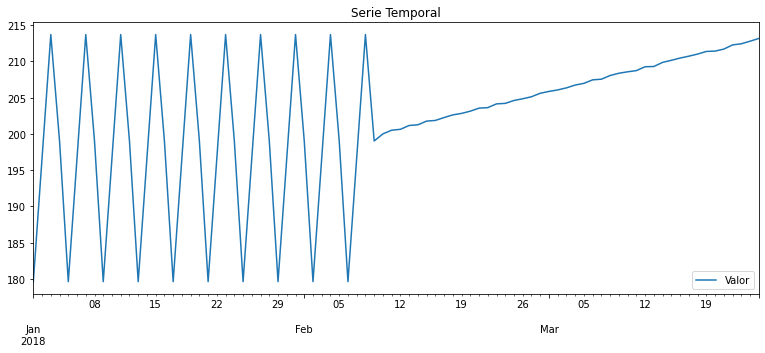

In [190]:
crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_per1,params_tend1,12,40)

,Valor
2018-01-01,200.159162
2018-01-02,200.599954
2018-01-03,200.731919
2018-01-04,201.077790
2018-01-05,201.293854
...,...
2018-03-21,298.212358
2018-03-22,310.043448
2018-03-23,322.332150
2018-03-24,334.924769


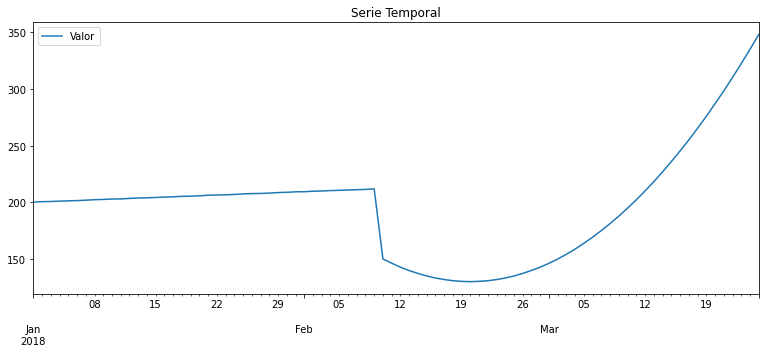

In [191]:
crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_tend1,params_tend2,13,40)

,Valor
2018-01-01,150.040967
2018-01-02,146.340275
2018-01-03,142.814011
2018-01-04,139.837151
2018-01-05,137.261412
...,...
2018-03-21,211.000000
2018-03-22,211.000000
2018-03-23,208.000000
2018-03-24,212.000000


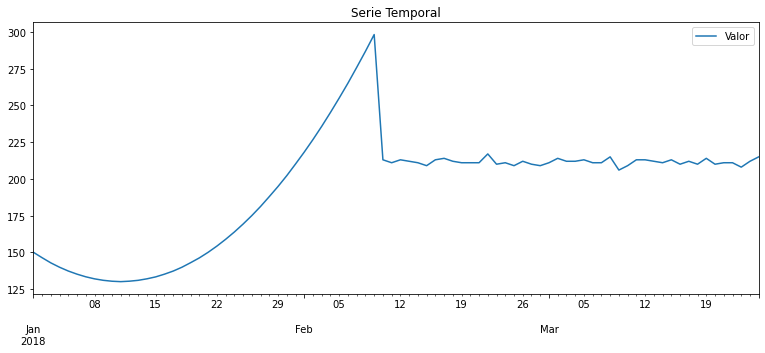

In [192]:
crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_tend2,paramsD2,14,40)

,Valor
2018-01-01,150.069960
2018-01-02,146.295048
2018-01-03,142.824686
2018-01-04,139.930940
2018-01-05,137.347675
...,...
2018-03-21,1552.970849
2018-03-22,1535.881915
2018-03-23,1593.534046
2018-03-24,1581.998109


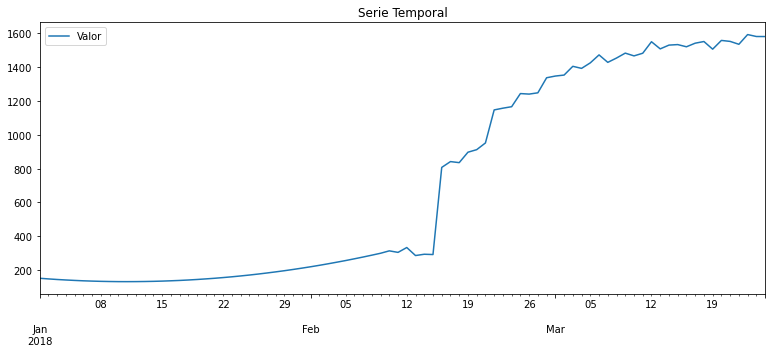

In [194]:
crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_tend2,params_ARMA1,15,40)

,Valor
2018-01-01,200.174499
2018-01-02,200.563118
2018-01-03,200.847321
2018-01-04,201.164715
2018-01-05,201.290039
...,...
2018-03-21,290.630859
2018-03-22,250.290565
2018-03-23,245.937667
2018-03-24,250.309344


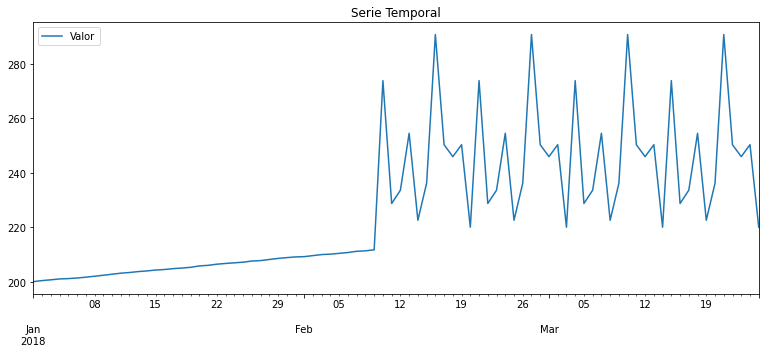

In [197]:
crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_tend1,params_per2,16,40)